In [1]:
import sys
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pathlib import Path
from astropy import units as u
from astropy.coordinates import SkyCoord
from regions import CircleSkyRegion, RectangleSkyRegion
from gammapy.maps import WcsGeom, MapAxis, Map, WcsNDMap
from gammapy.makers import MapDatasetMaker, SafeMaskMaker, FoVBackgroundMaker
from gammapy.data import DataStore
from gammapy.datasets import Datasets, FluxPointsDataset, MapDataset
from gammapy.modeling import Fit
from gammapy.modeling.models import SkyModel, LogParabolaSpectralModel, PointSpatialModel, PowerLawSpectralModel, FoVBackgroundModel, Models
from gammapy.estimators import FluxPoints,FluxPointsEstimator, ExcessMapEstimator
import runmatching_analysis as util

In [2]:
import sys  
sys.path.insert(1, '/home/hpc/caph/mppi103h/Documents/On-OFF-matching-woody')
import common_utils
from common_utils import get_excluded_regions

In [3]:
from importlib import reload
reload(util)

<module 'runmatching_analysis' from '/home/hpc/caph/mppi103h/Documents/On-OFF-matching-woody/test_data/runmatching_analysis.py'>

In [4]:
config = 'std_ImPACT_fullEnclosure_updated'
outputBase = '/home/wecapstor1/caph/mppi103h/On-Off-matching/checks/datasets'
plotDir = '/home/wecapstor1/caph/mppi103h/On-Off-matching/checks/plots/zenith'

DB_general = pd.read_csv('/home/wecapstor1/caph/shared/hess/fits/database_image/data_1223.csv', header=0)

In [5]:
def save(fig, filename):
    savedir = '{}'.format(plotDir)
    for form in ['png', 'pdf']:
        fig.savefig('{}/{}.{}'.format(plotDir, filename, form),dpi=150, bbox_inches = "tight")

# Load the Runlist

In [10]:
#load the data and the background model
data_path = '/home/wecapstor1/caph/mppi103h/On-Off-matching/runlists/final/runlist_zenith_hess1.txt'
bgmodel_version = 'v07c'
runs = np.loadtxt(data_path, usecols=(0,), dtype=int)


basedir = '/path/to/data/hess1/{}'.format(config)
print(basedir)
ds = DataStore.from_dir(basedir,
                           'hdu-index.fits.gz'.format(bgmodel_version),
                           'obs-index.fits.gz'.format(bgmodel_version))
obs_list = ds.get_observations(runs) 

/home/wecapstor1/caph/shared/hess/fits/fits_data/prod05/hess1/std_ImPACT_fullEnclosure_updated


Skipping run with missing HDUs; Required HDUs ['bkg'] not found in observation 22099
Skipping run with missing HDUs; Required HDUs ['bkg'] not found in observation 22241


# Create the datasets

In [107]:
#define the geometry of the dataset
ra_obj = 329.717
dec_obj = -30.226
name_obj = 'Crab'
target = SkyCoord(ra_obj, dec_obj, frame='icrs', unit='deg')

e_reco = np.logspace(-1, 2, 25) * u.TeV 
e_true = np.logspace(-1, 2, 49) * u.TeV 

energy_axis = MapAxis.from_edges(e_reco, unit='TeV', name='energy', interp='log')
energy_axis_true = MapAxis.from_edges(e_true, unit='TeV', name="energy_true", interp='log')

geom = WcsGeom.create(
    skydir=(ra_obj, dec_obj),
    binsz=0.02,
    width=(7, 7),
    frame="icrs",
    proj="CAR",
    axes=[energy_axis],)

In [108]:
def get_exclusion_mask():
        """ Define the exclusion mask that will be used for the background fit """ 
        
        hap_exclusion_regions = get_excluded_regions(ra_obj, dec_obj, 4)
        excl_regions = []
        for source in hap_exclusion_regions:
            center = SkyCoord(source.ra, source.dec, unit='deg', frame='icrs')
            region = CircleSkyRegion(center=center, radius=source.radius*u.deg)
            excl_regions.append(region)

        data2 = geom.region_mask(regions=excl_regions, inside=False)
        maker_fov_off = FoVBackgroundMaker(method="fit", exclusion_mask=data2)
        ex = maker_fov_off.exclusion_mask.cutout(obs.pointing.fixed_icrs,
                                                 width=2 * 2.0 * u.deg)
        return maker_fov_off, ex

In [109]:
def compute_empty_dataset(geom):
        
        stacked = MapDataset.create(
        geom = geom, 
        name = "Crab",  
        energy_axis_true = energy_axis_true
        )
        
        return stacked

Missing 'HDUCLAS2' keyword assuming 'BKG'


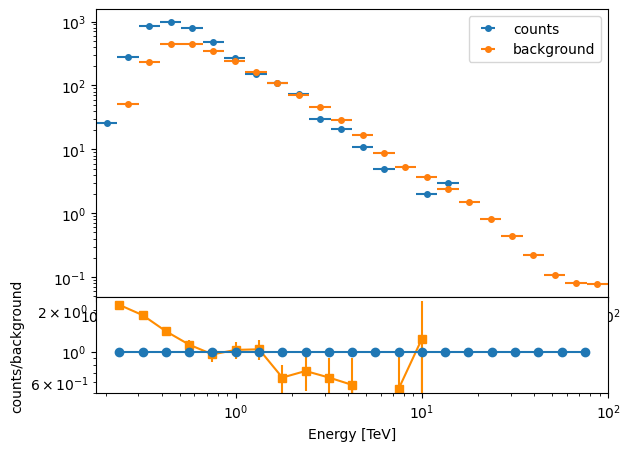

Missing 'HDUCLAS2' keyword assuming 'BKG'


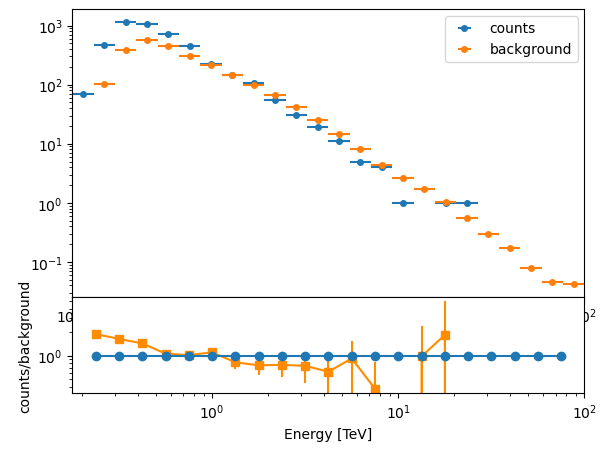

Missing 'HDUCLAS2' keyword assuming 'BKG'


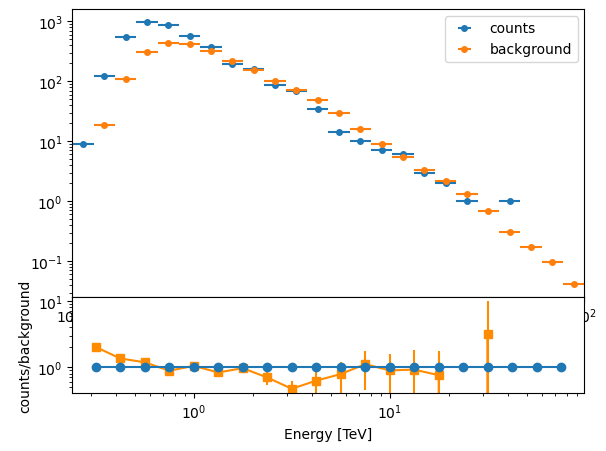

Missing 'HDUCLAS2' keyword assuming 'BKG'


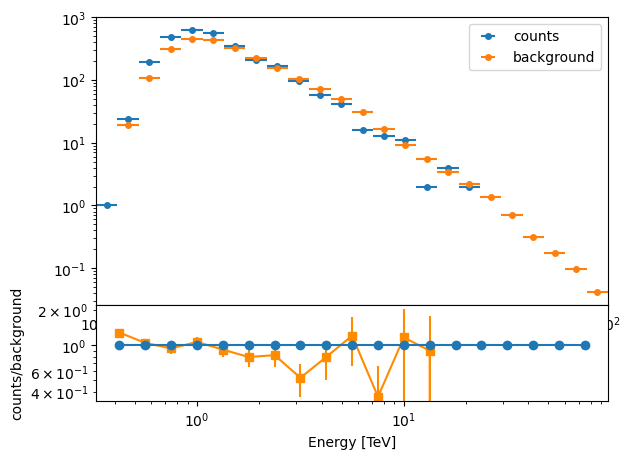

Missing 'HDUCLAS2' keyword assuming 'BKG'


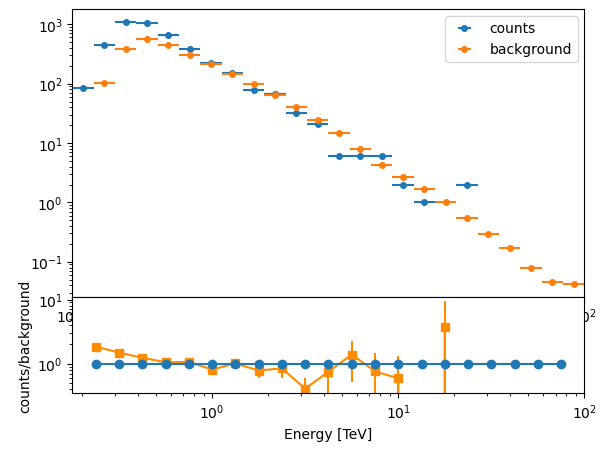

Missing 'HDUCLAS2' keyword assuming 'BKG'


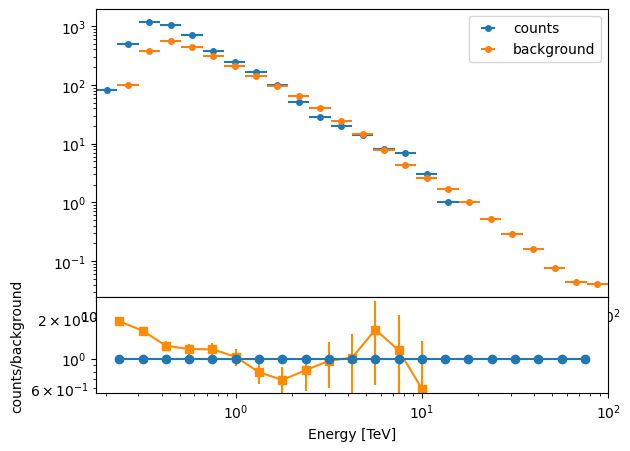

Missing 'HDUCLAS2' keyword assuming 'BKG'


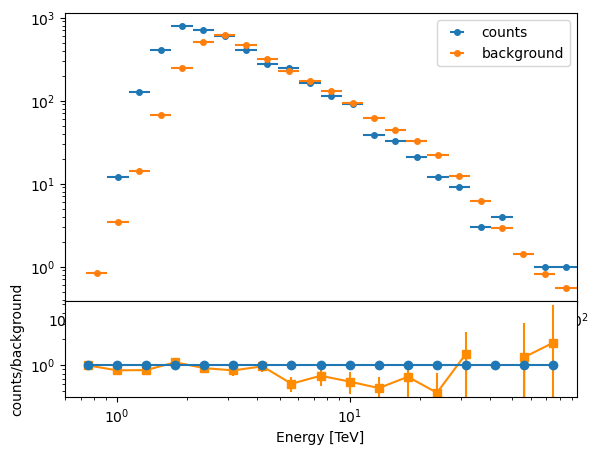

Missing 'HDUCLAS2' keyword assuming 'BKG'


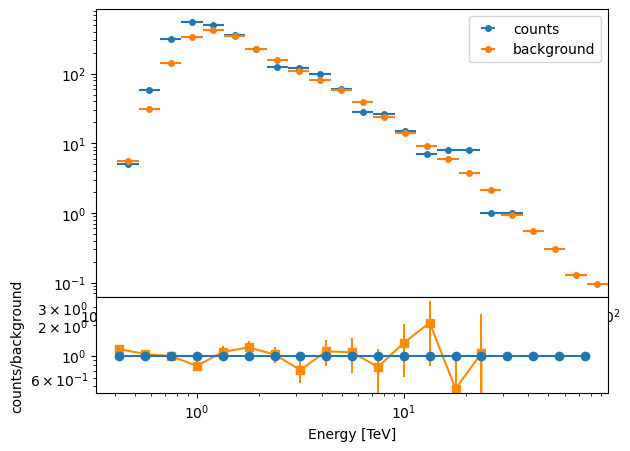

Missing 'HDUCLAS2' keyword assuming 'BKG'


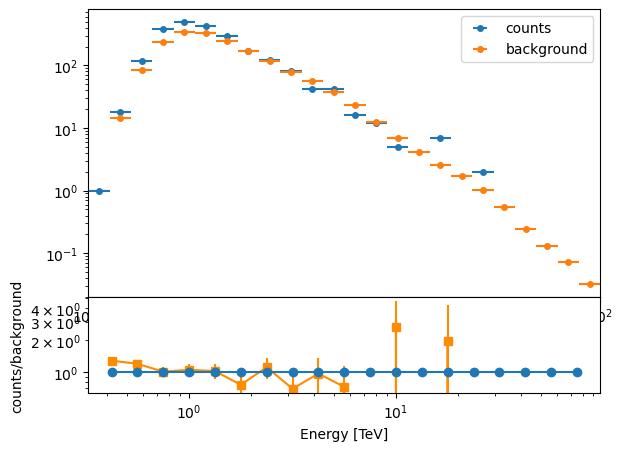

Missing 'HDUCLAS2' keyword assuming 'BKG'


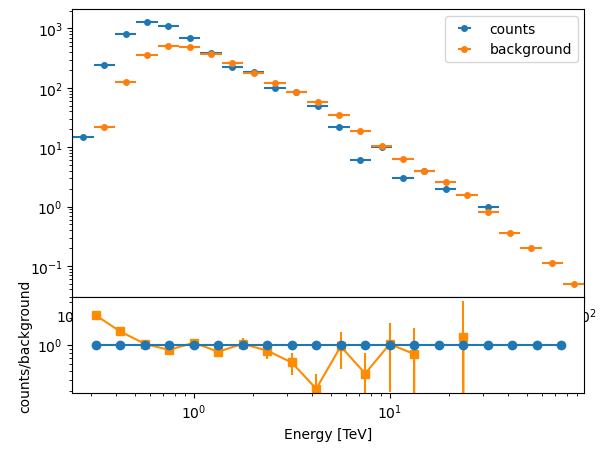

Missing 'HDUCLAS2' keyword assuming 'BKG'


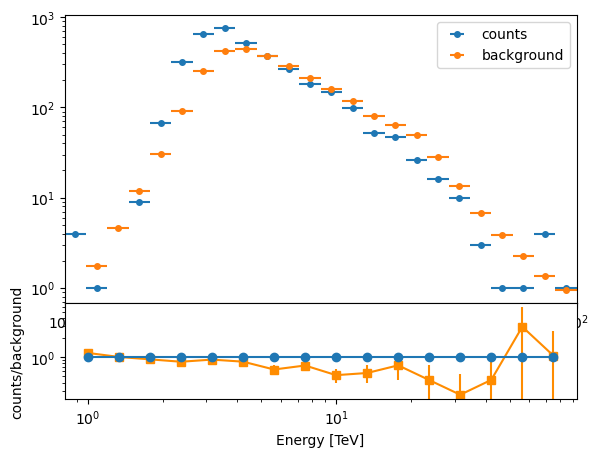

Missing 'HDUCLAS2' keyword assuming 'BKG'


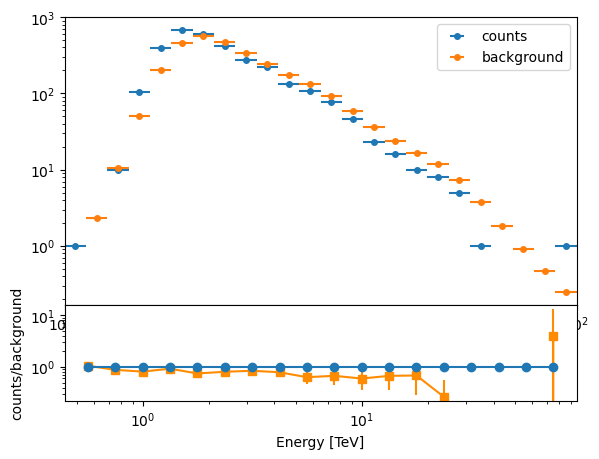

Missing 'HDUCLAS2' keyword assuming 'BKG'


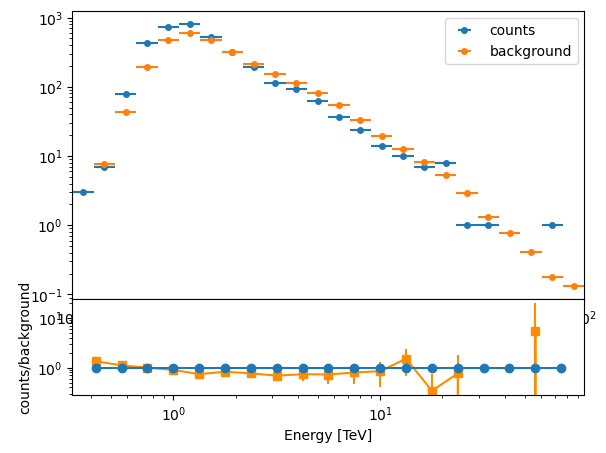

Missing 'HDUCLAS2' keyword assuming 'BKG'


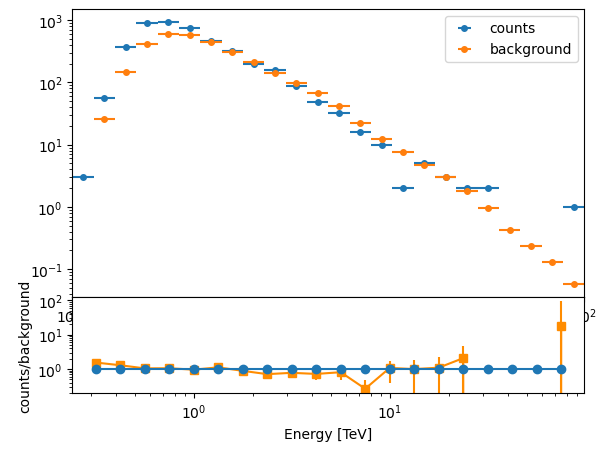

Missing 'HDUCLAS2' keyword assuming 'BKG'


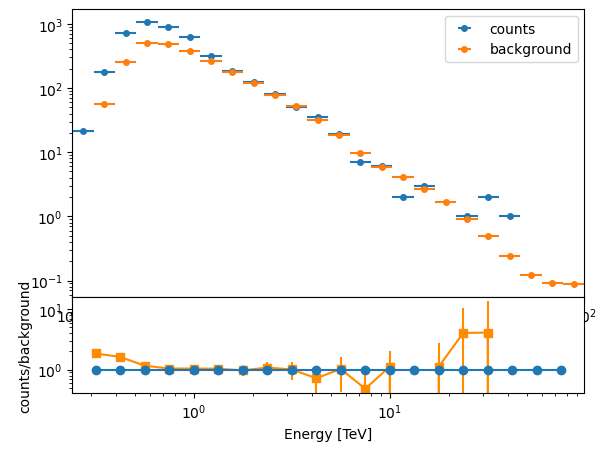

Missing 'HDUCLAS2' keyword assuming 'BKG'


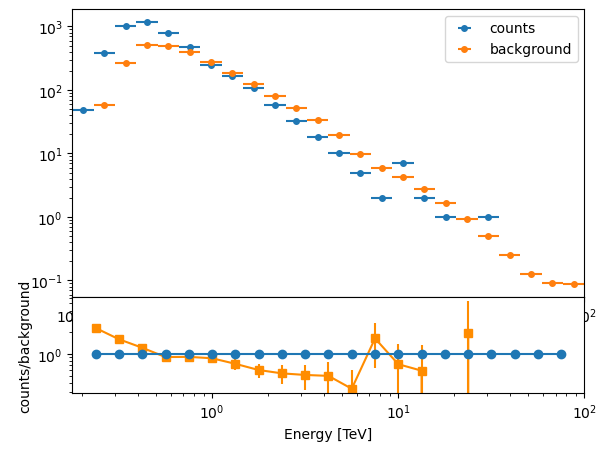

Missing 'HDUCLAS2' keyword assuming 'BKG'


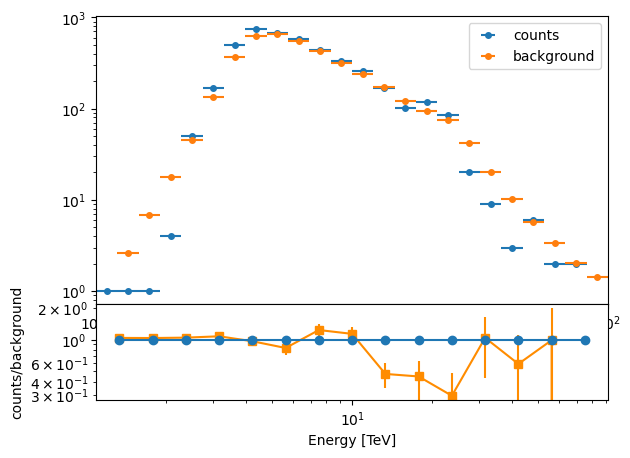

Missing 'HDUCLAS2' keyword assuming 'BKG'


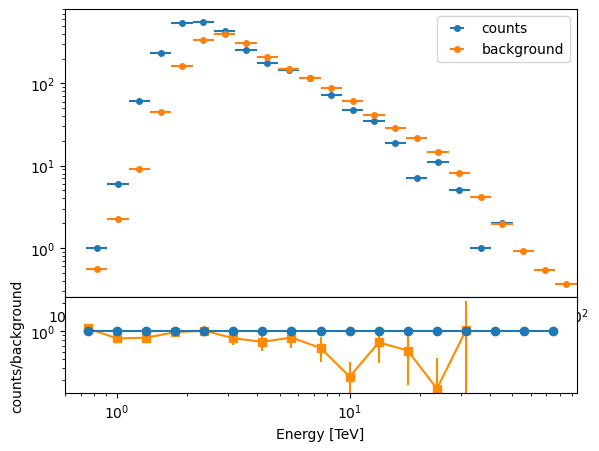

Missing 'HDUCLAS2' keyword assuming 'BKG'


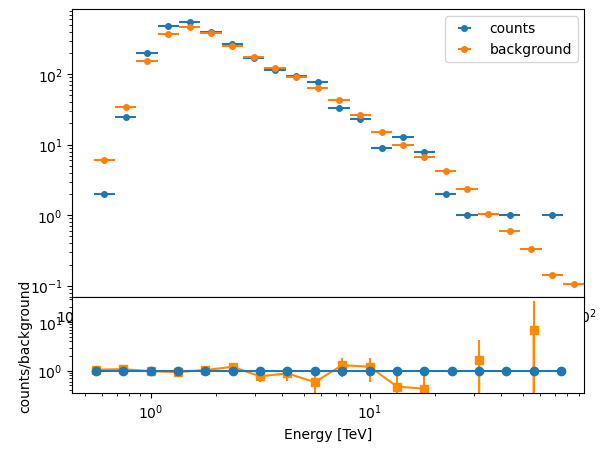

Missing 'HDUCLAS2' keyword assuming 'BKG'


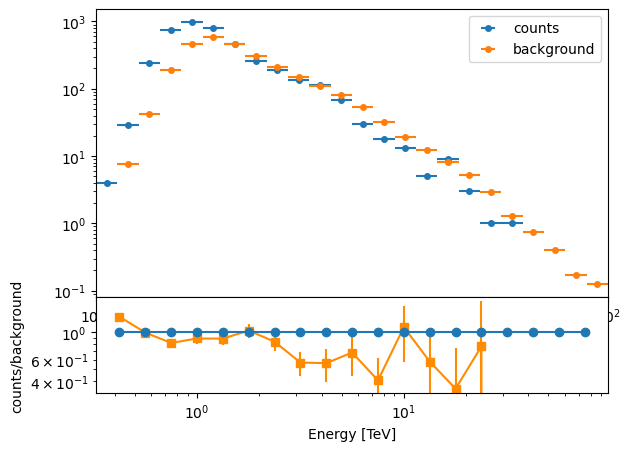

Missing 'HDUCLAS2' keyword assuming 'BKG'


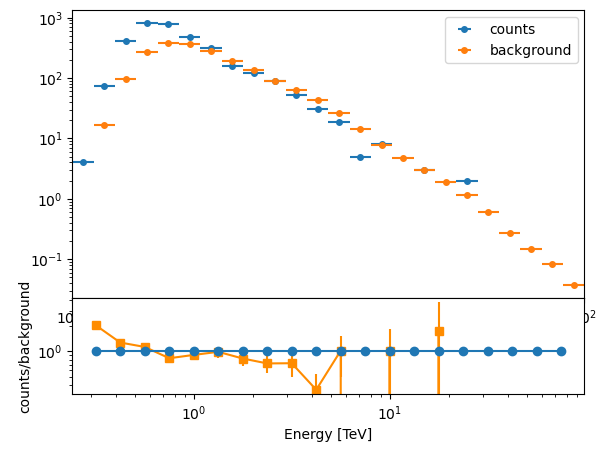

Missing 'HDUCLAS2' keyword assuming 'BKG'


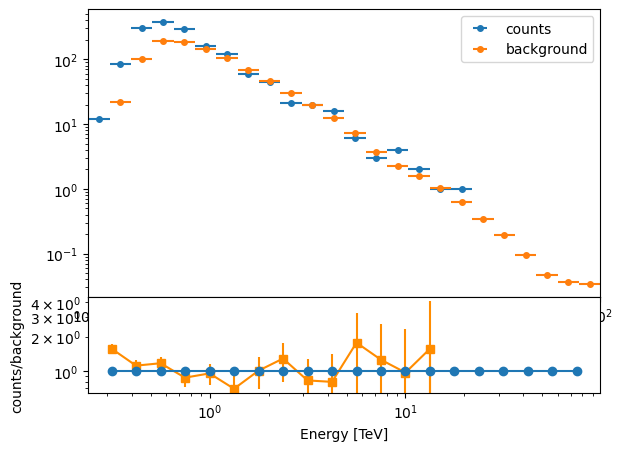

Missing 'HDUCLAS2' keyword assuming 'BKG'


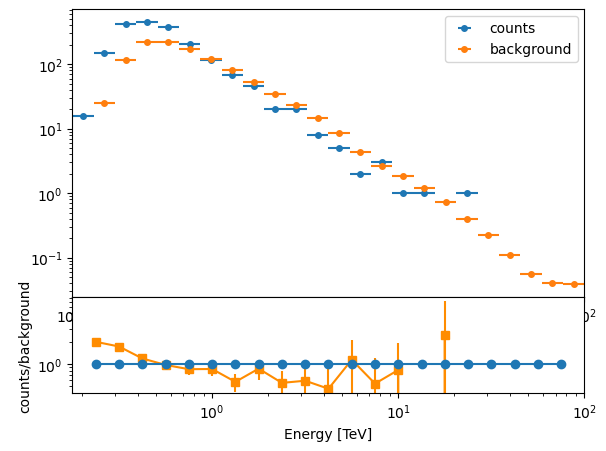

Missing 'HDUCLAS2' keyword assuming 'BKG'


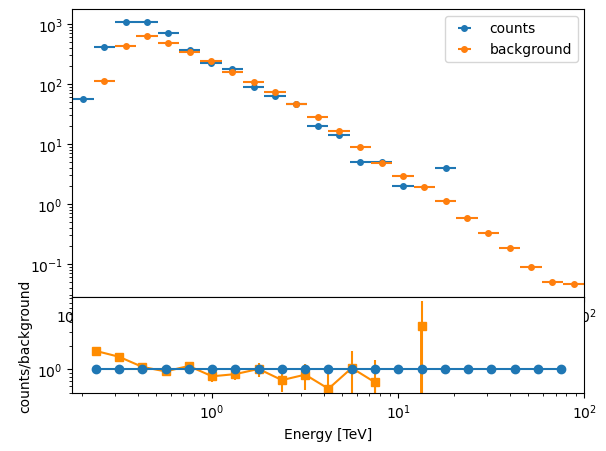

Missing 'HDUCLAS2' keyword assuming 'BKG'


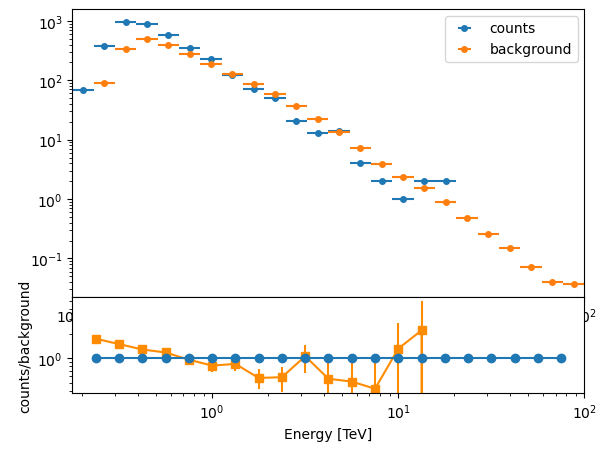

Missing 'HDUCLAS2' keyword assuming 'BKG'


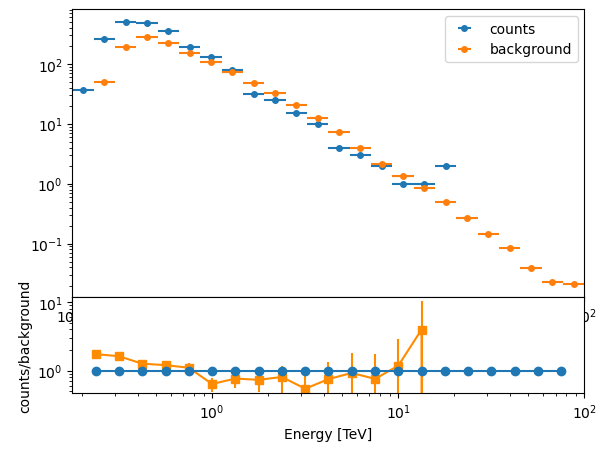

Missing 'HDUCLAS2' keyword assuming 'BKG'


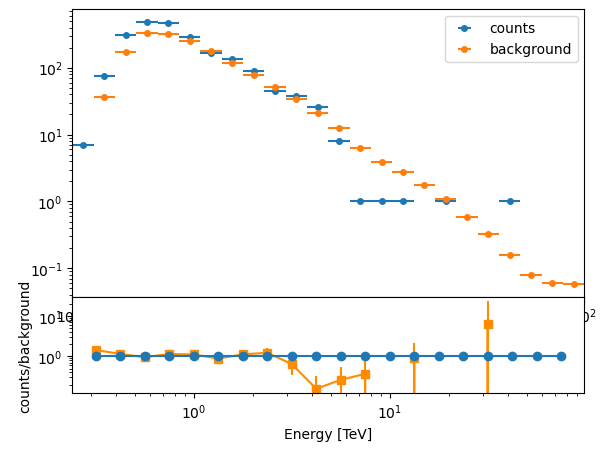

Missing 'HDUCLAS2' keyword assuming 'BKG'


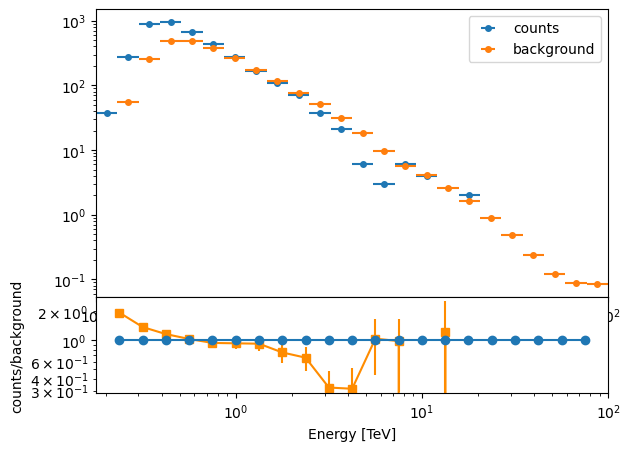

Missing 'HDUCLAS2' keyword assuming 'BKG'


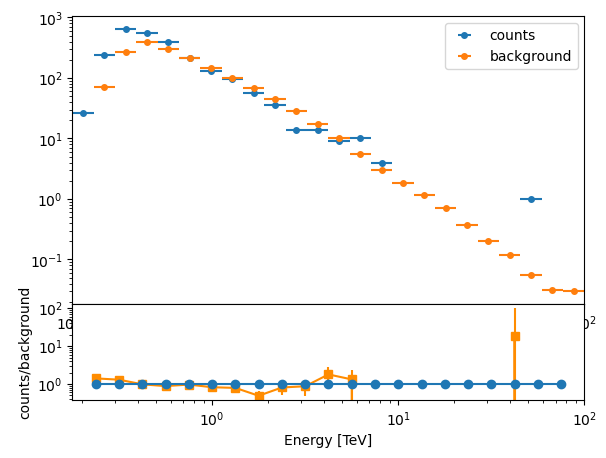

Missing 'HDUCLAS2' keyword assuming 'BKG'


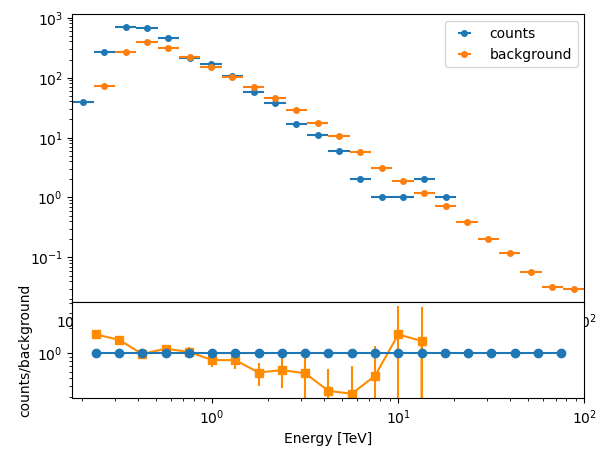

Missing 'HDUCLAS2' keyword assuming 'BKG'


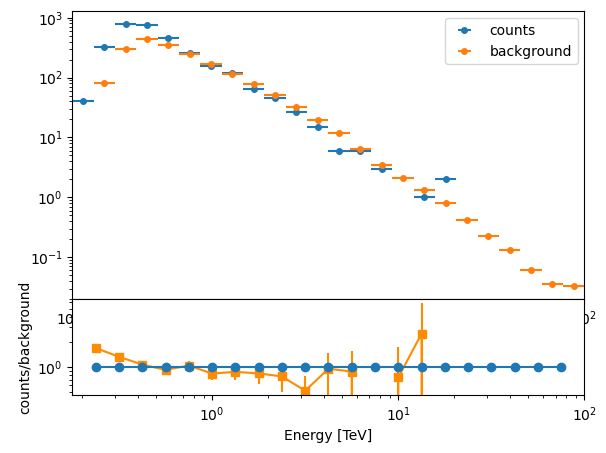

Missing 'HDUCLAS2' keyword assuming 'BKG'


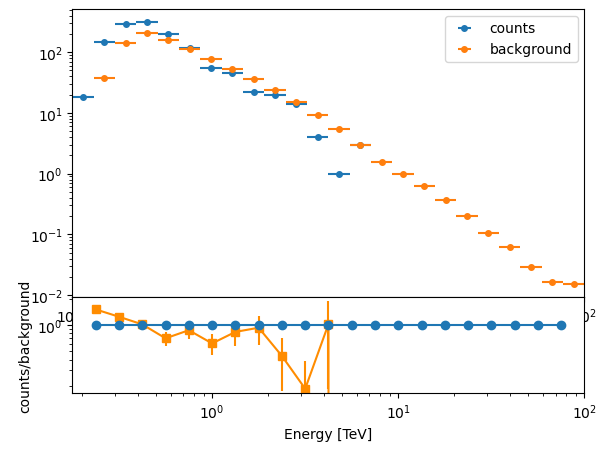

Missing 'HDUCLAS2' keyword assuming 'BKG'


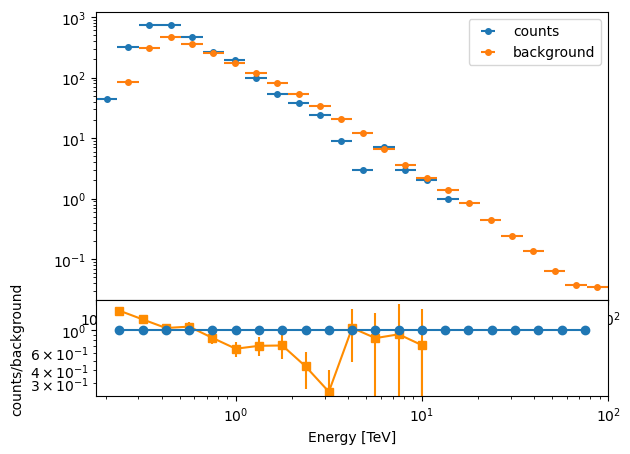

Missing 'HDUCLAS2' keyword assuming 'BKG'


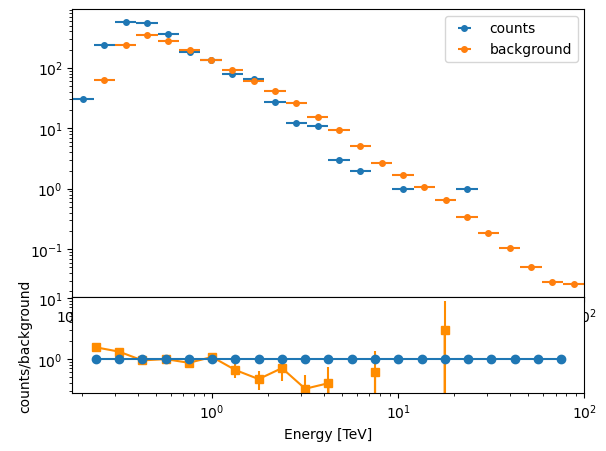

Missing 'HDUCLAS2' keyword assuming 'BKG'


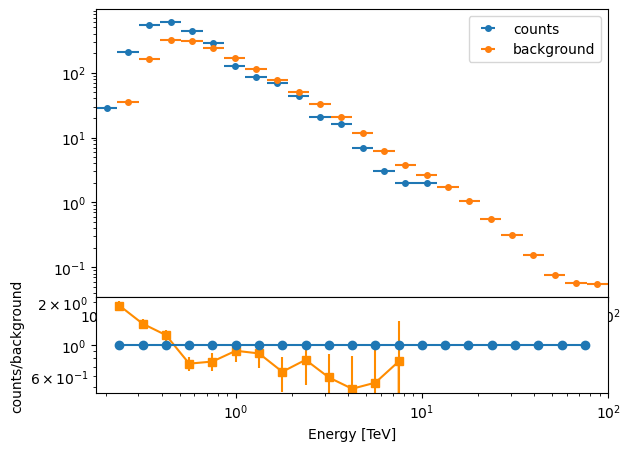

Missing 'HDUCLAS2' keyword assuming 'BKG'


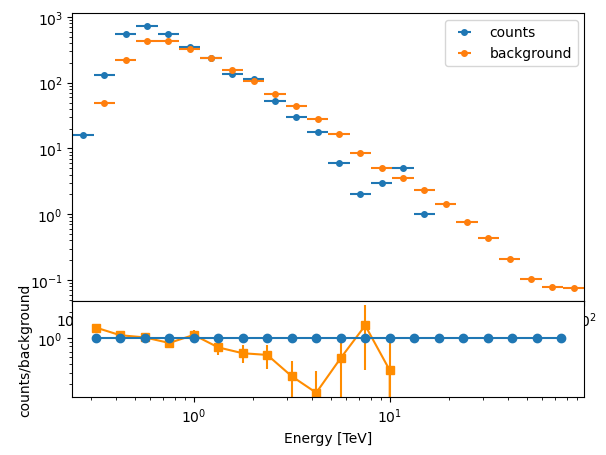

Missing 'HDUCLAS2' keyword assuming 'BKG'


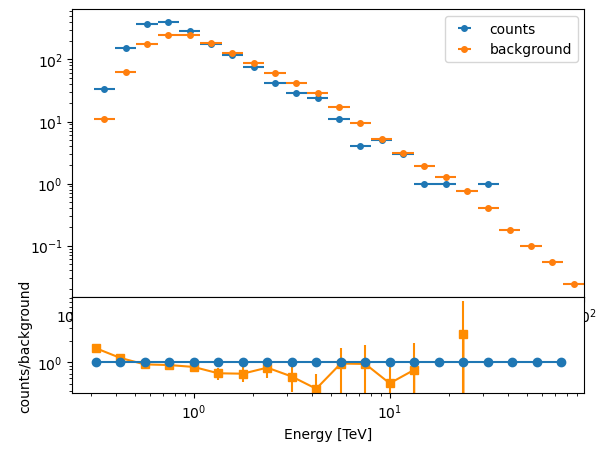

Missing 'HDUCLAS2' keyword assuming 'BKG'


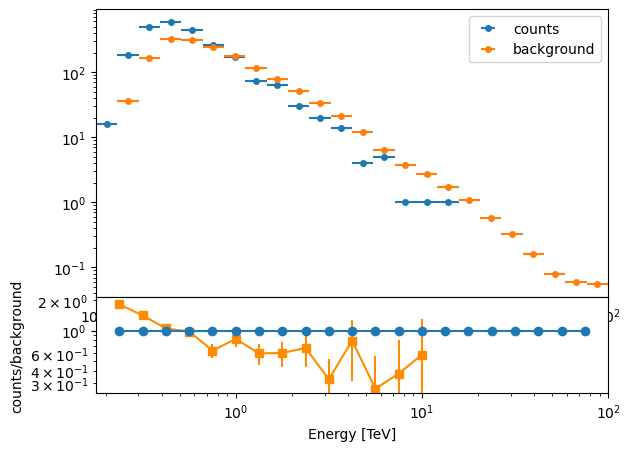

Missing 'HDUCLAS2' keyword assuming 'BKG'


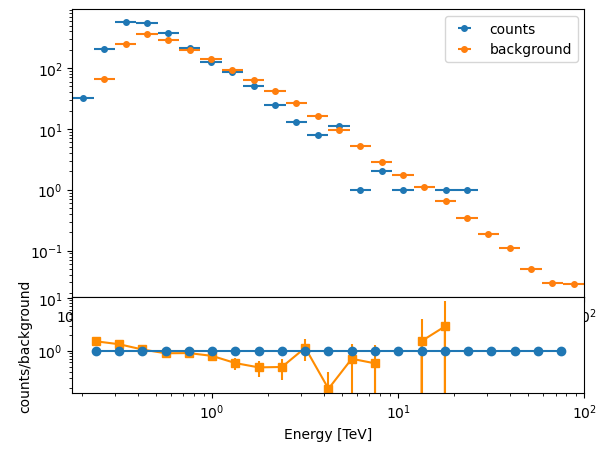

Missing 'HDUCLAS2' keyword assuming 'BKG'


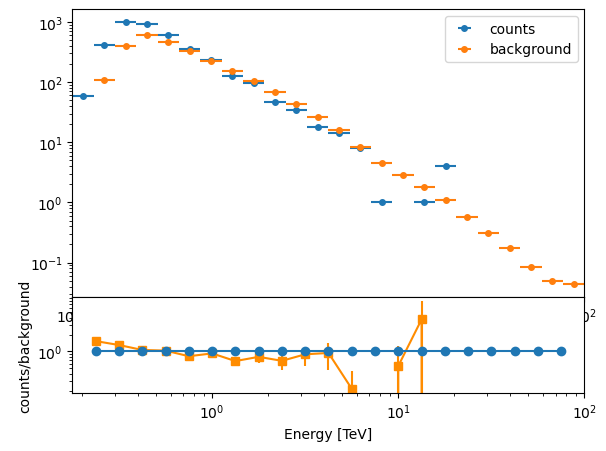

Missing 'HDUCLAS2' keyword assuming 'BKG'


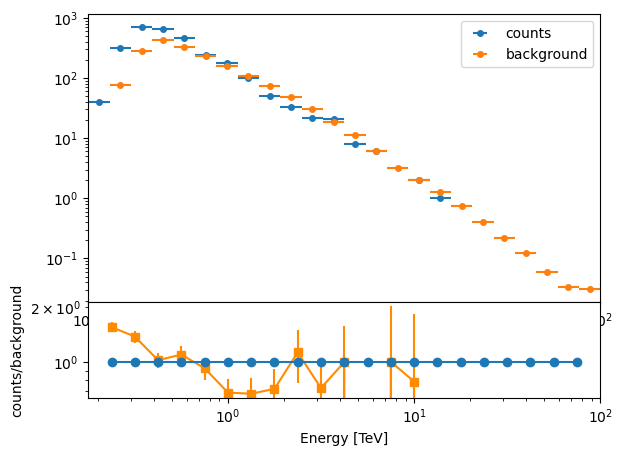

Missing 'HDUCLAS2' keyword assuming 'BKG'


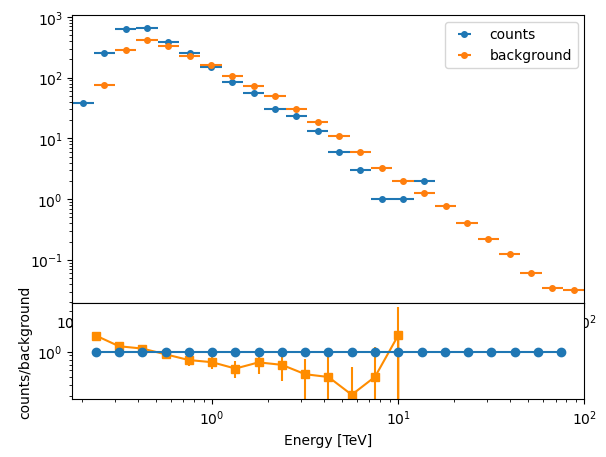

Missing 'HDUCLAS2' keyword assuming 'BKG'


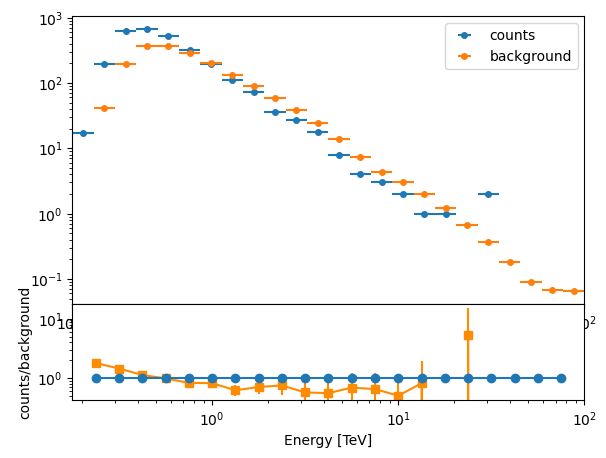

Missing 'HDUCLAS2' keyword assuming 'BKG'


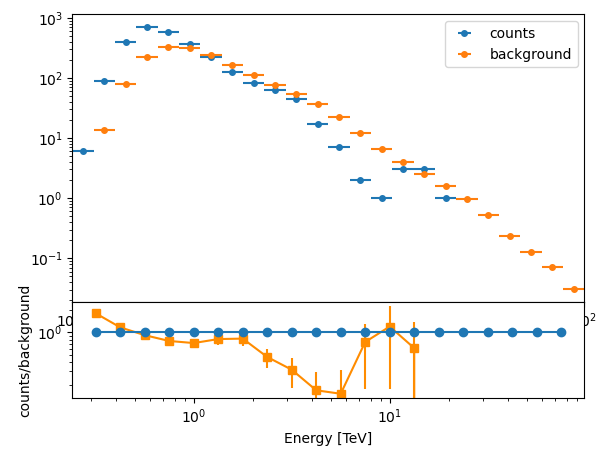

Missing 'HDUCLAS2' keyword assuming 'BKG'


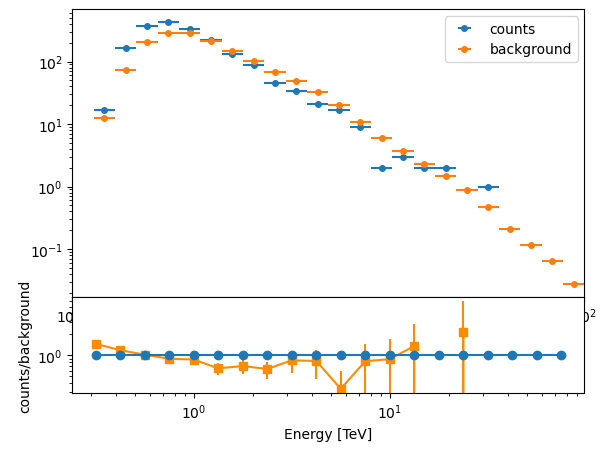

Missing 'HDUCLAS2' keyword assuming 'BKG'


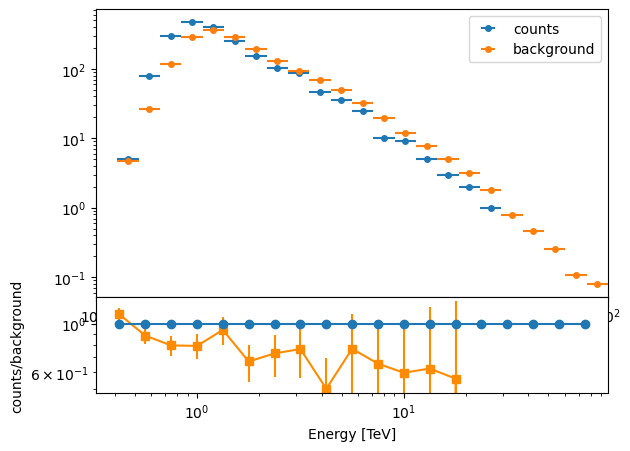

Missing 'HDUCLAS2' keyword assuming 'BKG'


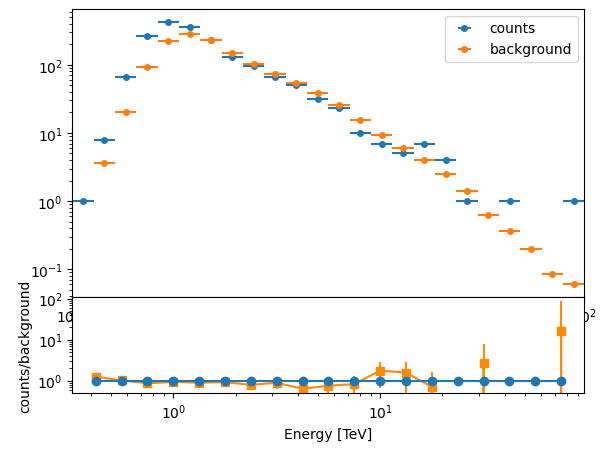

Missing 'HDUCLAS2' keyword assuming 'BKG'


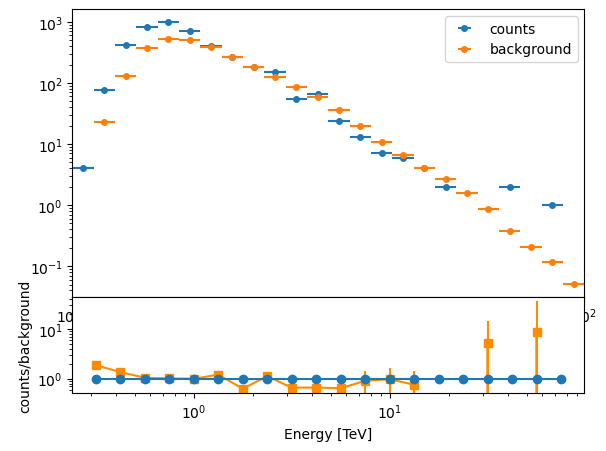

Missing 'HDUCLAS2' keyword assuming 'BKG'


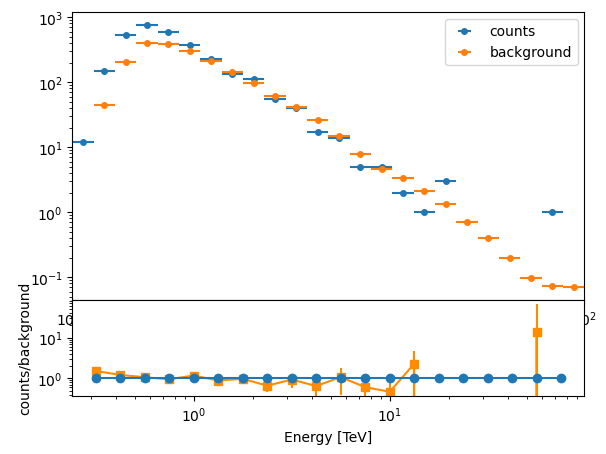

Missing 'HDUCLAS2' keyword assuming 'BKG'


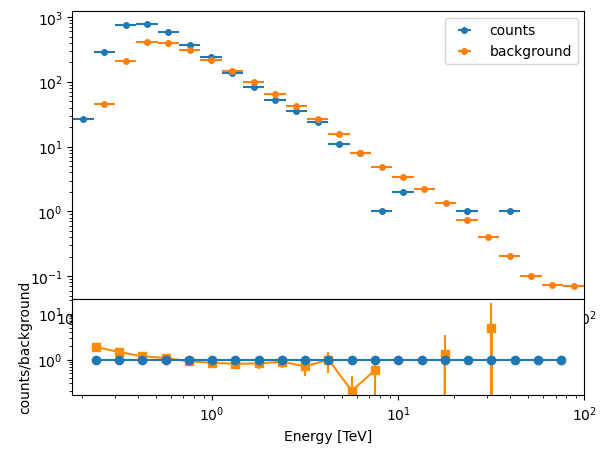

Missing 'HDUCLAS2' keyword assuming 'BKG'


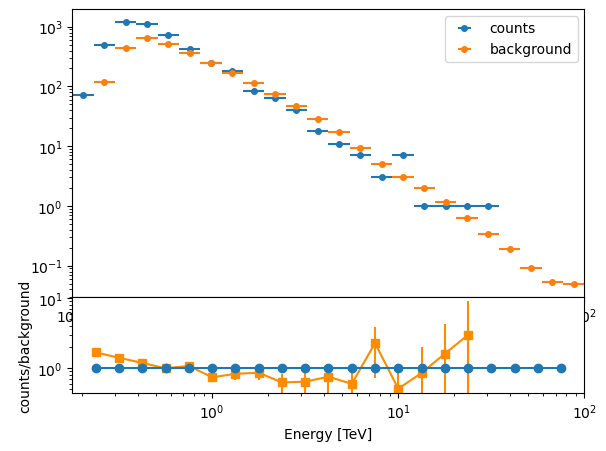

Missing 'HDUCLAS2' keyword assuming 'BKG'


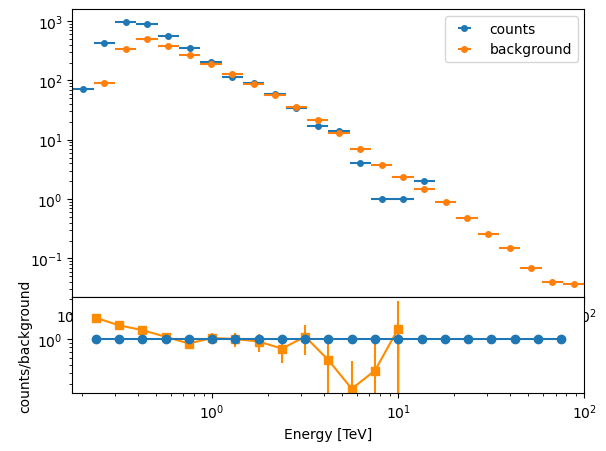

Missing 'HDUCLAS2' keyword assuming 'BKG'


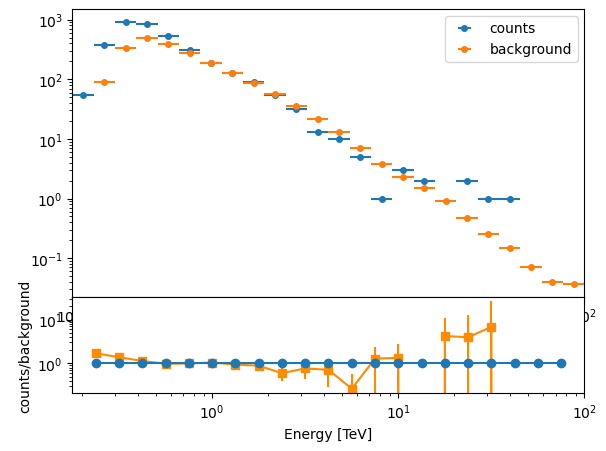

Missing 'HDUCLAS2' keyword assuming 'BKG'


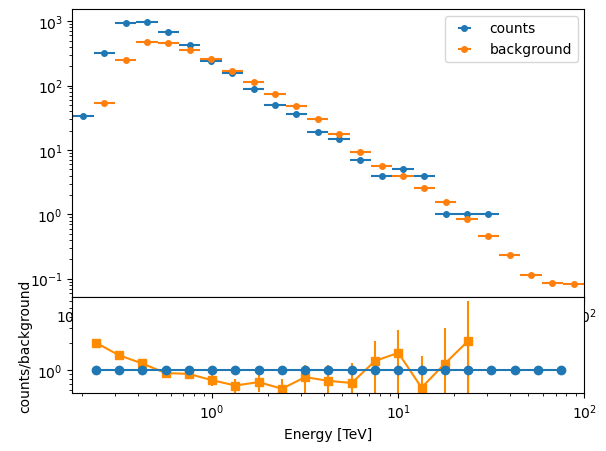

Missing 'HDUCLAS2' keyword assuming 'BKG'


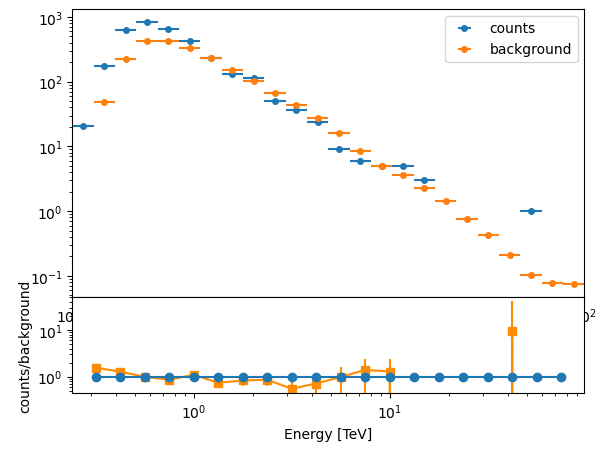

Missing 'HDUCLAS2' keyword assuming 'BKG'


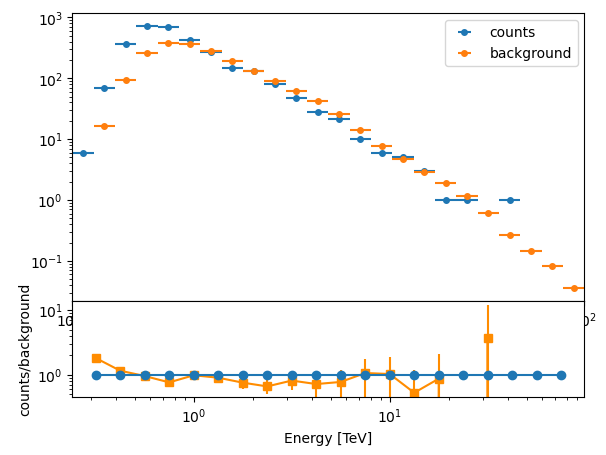

Missing 'HDUCLAS2' keyword assuming 'BKG'


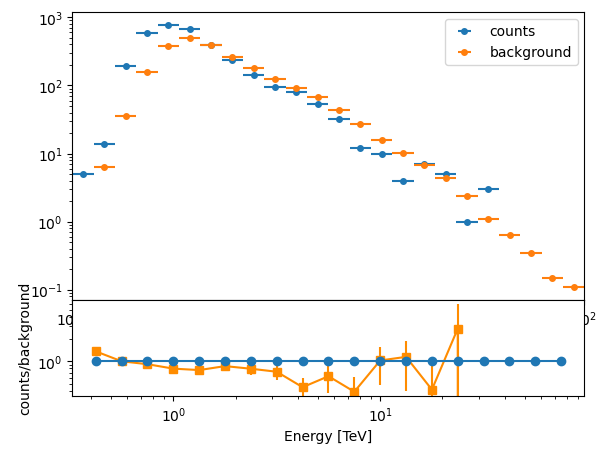

Missing 'HDUCLAS2' keyword assuming 'BKG'


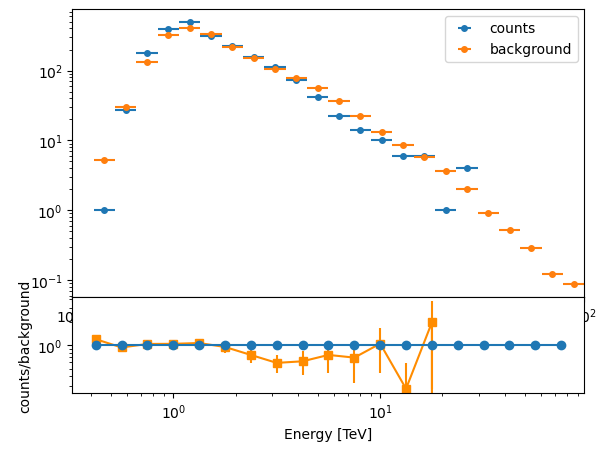

Missing 'HDUCLAS2' keyword assuming 'BKG'


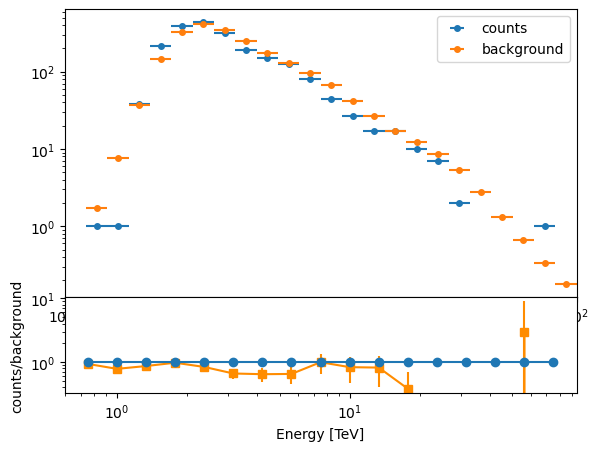

Missing 'HDUCLAS2' keyword assuming 'BKG'


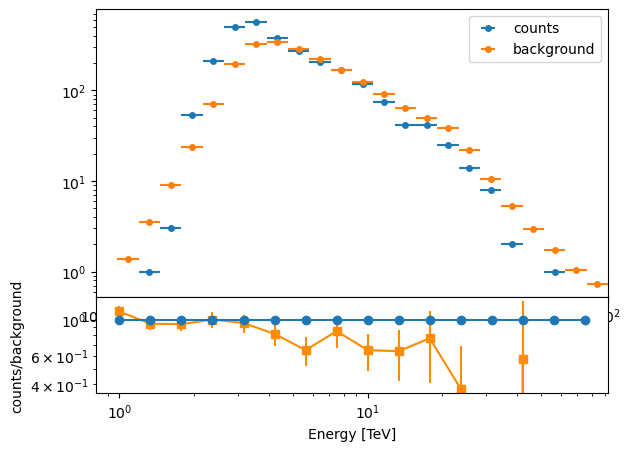

Missing 'HDUCLAS2' keyword assuming 'BKG'


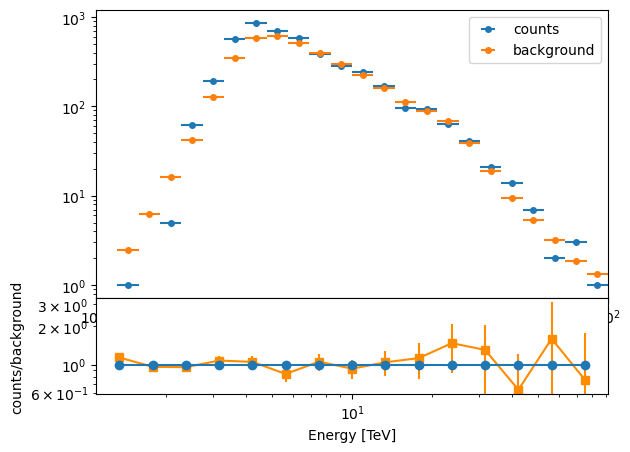

Missing 'HDUCLAS2' keyword assuming 'BKG'


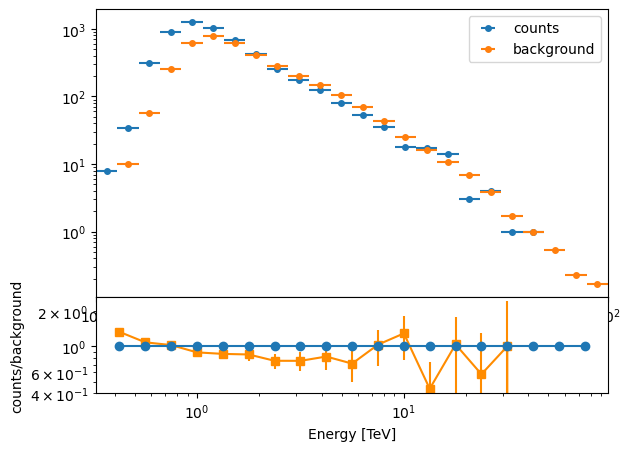

Missing 'HDUCLAS2' keyword assuming 'BKG'


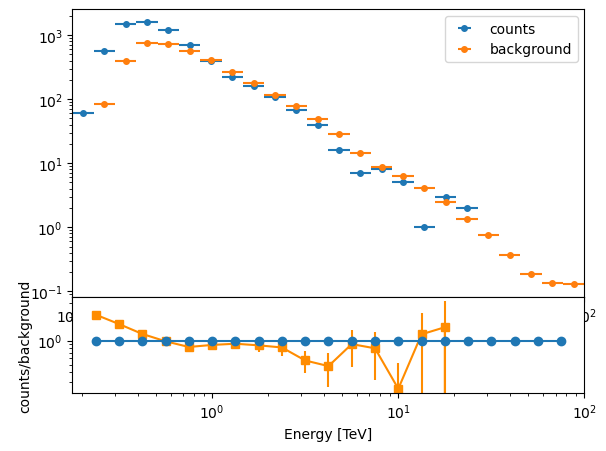

Missing 'HDUCLAS2' keyword assuming 'BKG'


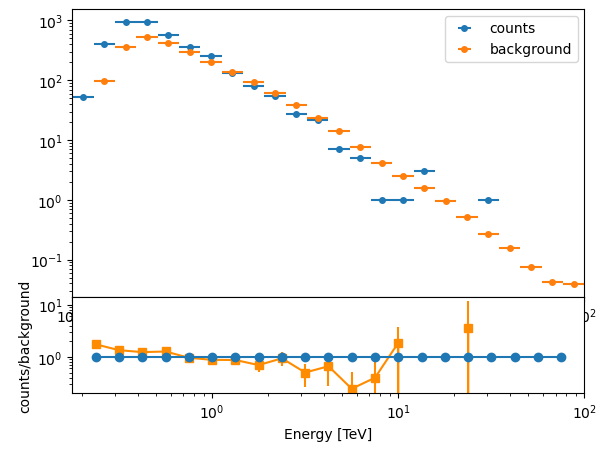

Missing 'HDUCLAS2' keyword assuming 'BKG'


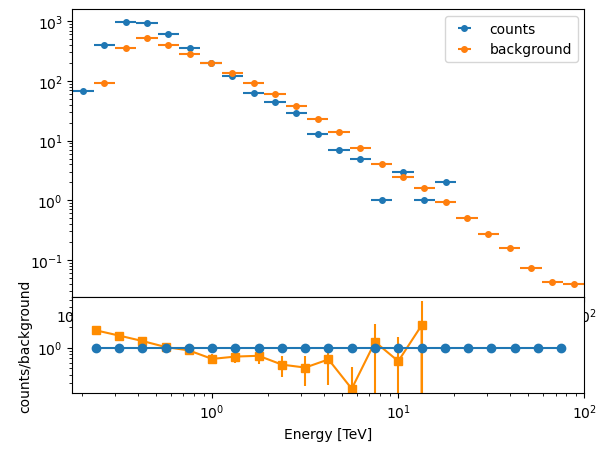

Missing 'HDUCLAS2' keyword assuming 'BKG'


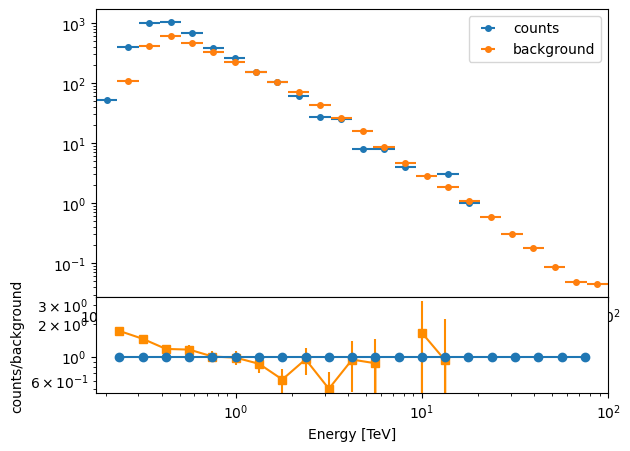

Missing 'HDUCLAS2' keyword assuming 'BKG'


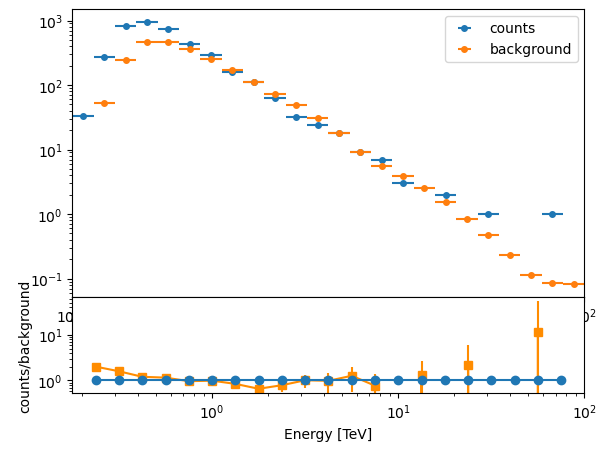

Missing 'HDUCLAS2' keyword assuming 'BKG'


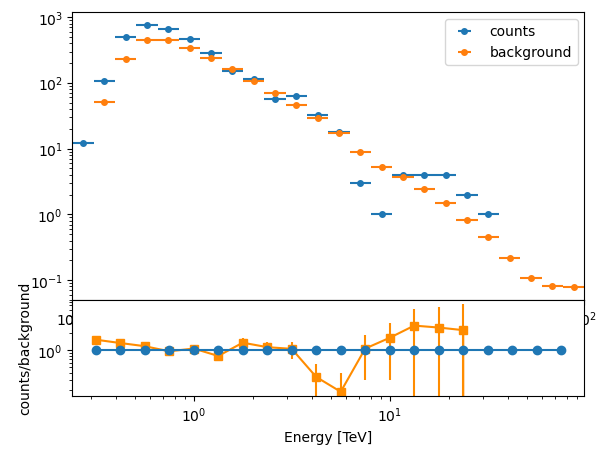

Missing 'HDUCLAS2' keyword assuming 'BKG'


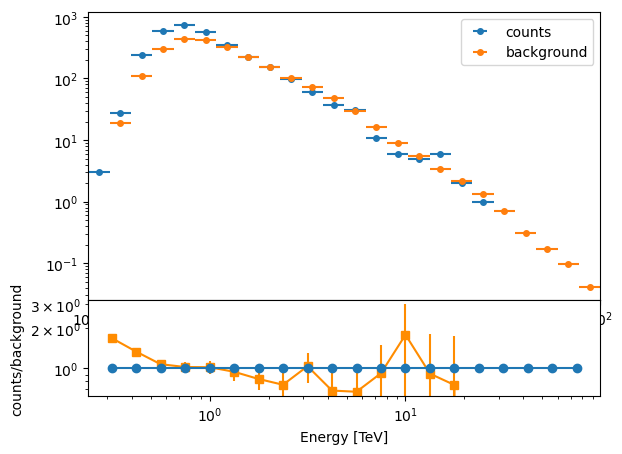

Missing 'HDUCLAS2' keyword assuming 'BKG'


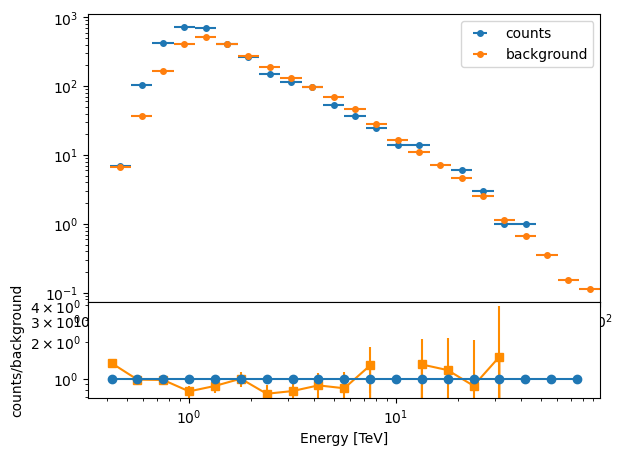

Missing 'HDUCLAS2' keyword assuming 'BKG'


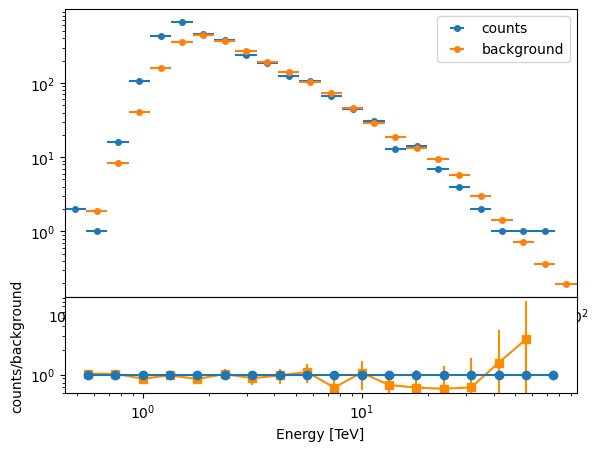

Missing 'HDUCLAS2' keyword assuming 'BKG'


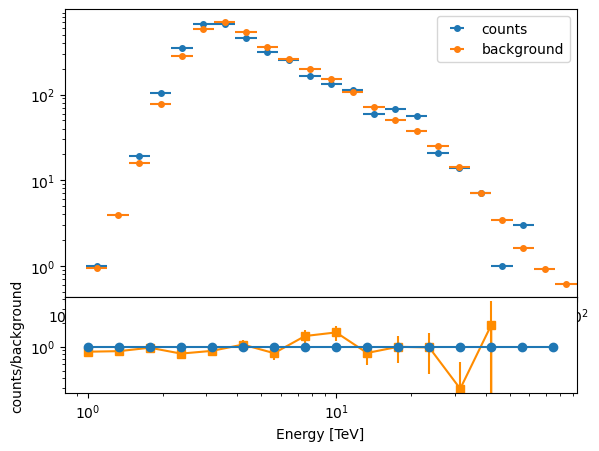

Missing 'HDUCLAS2' keyword assuming 'BKG'


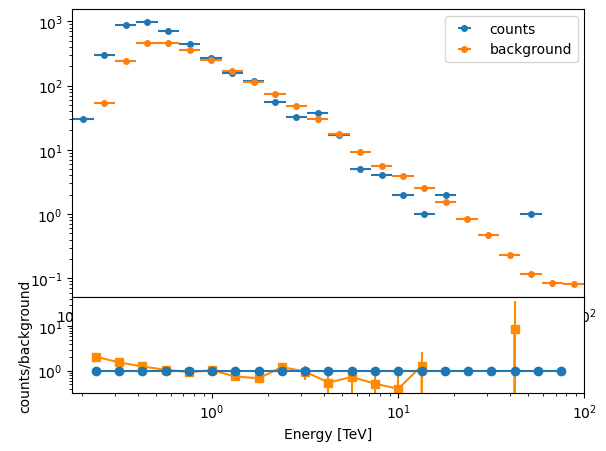

Missing 'HDUCLAS2' keyword assuming 'BKG'


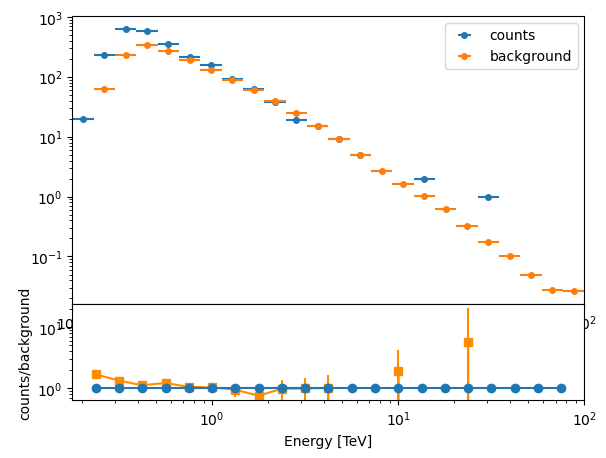

Missing 'HDUCLAS2' keyword assuming 'BKG'


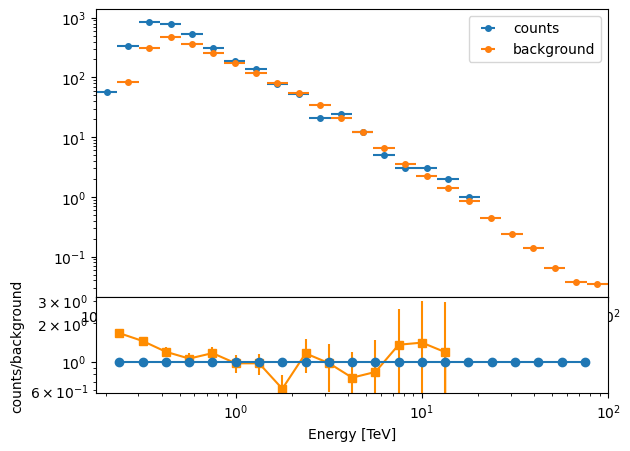

Missing 'HDUCLAS2' keyword assuming 'BKG'


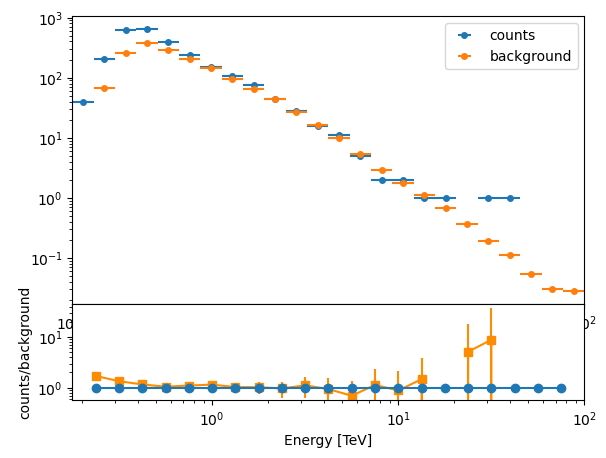

Missing 'HDUCLAS2' keyword assuming 'BKG'


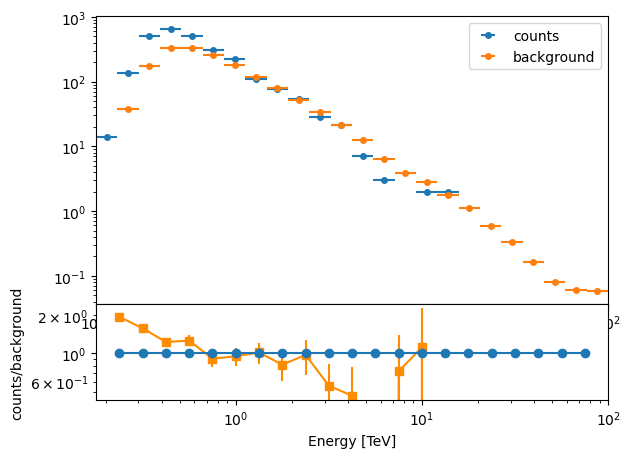

Missing 'HDUCLAS2' keyword assuming 'BKG'


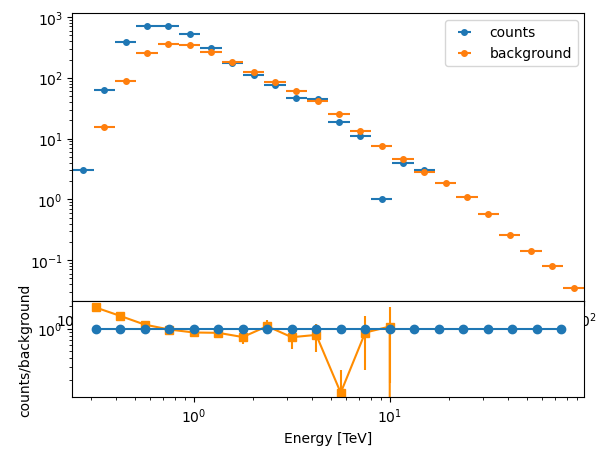

Missing 'HDUCLAS2' keyword assuming 'BKG'


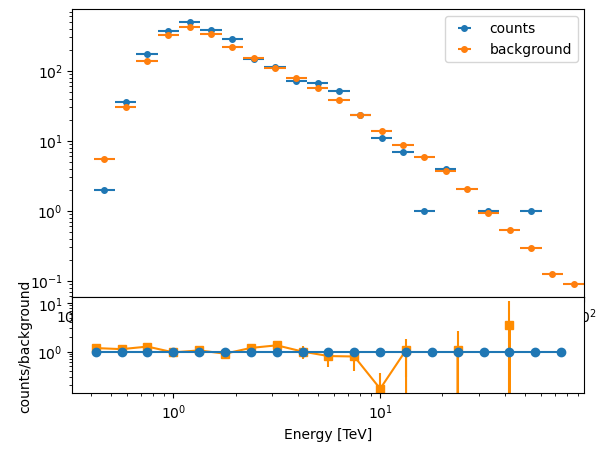

Missing 'HDUCLAS2' keyword assuming 'BKG'


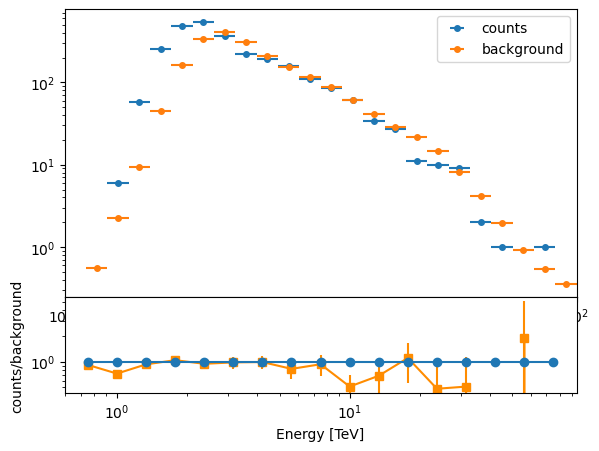

Missing 'HDUCLAS2' keyword assuming 'BKG'


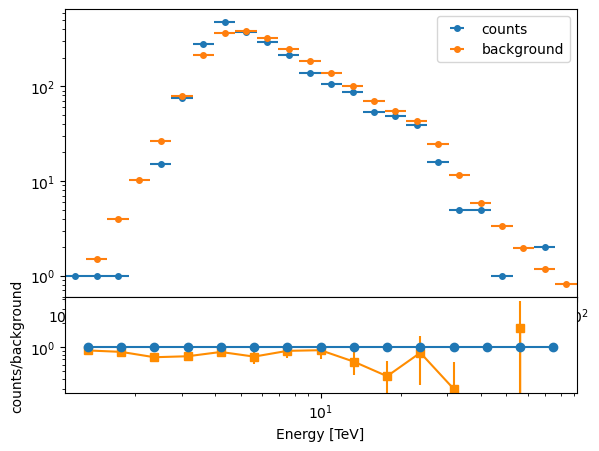

Missing 'HDUCLAS2' keyword assuming 'BKG'


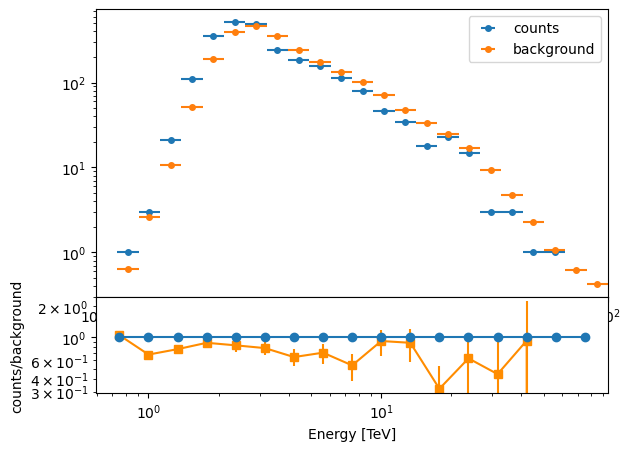

Missing 'HDUCLAS2' keyword assuming 'BKG'


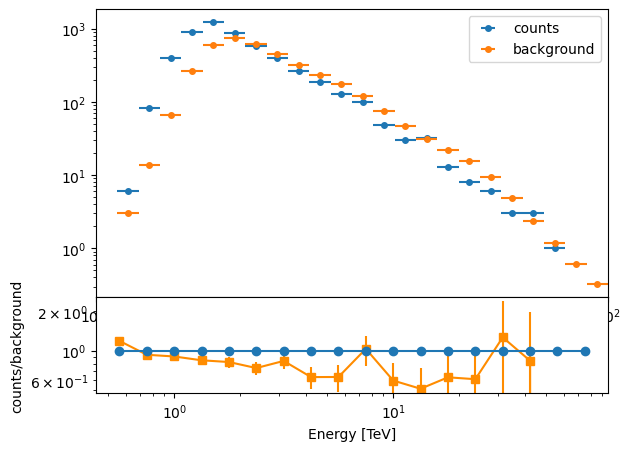

Missing 'HDUCLAS2' keyword assuming 'BKG'


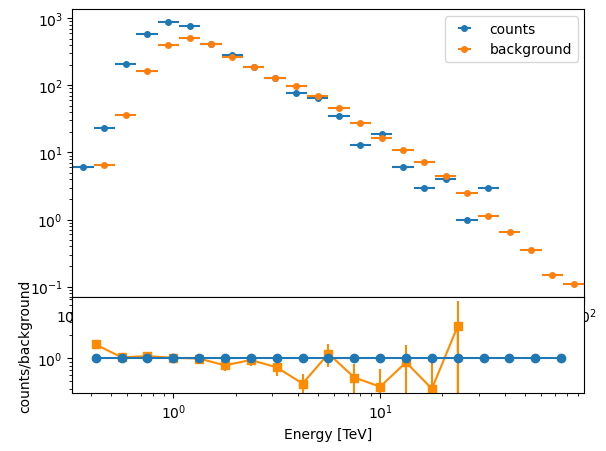

Missing 'HDUCLAS2' keyword assuming 'BKG'


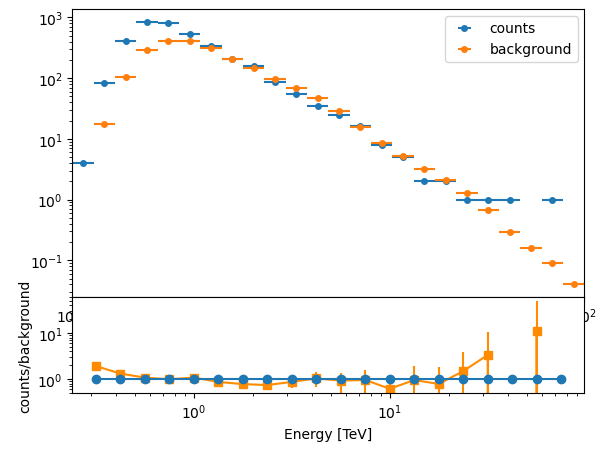

Missing 'HDUCLAS2' keyword assuming 'BKG'


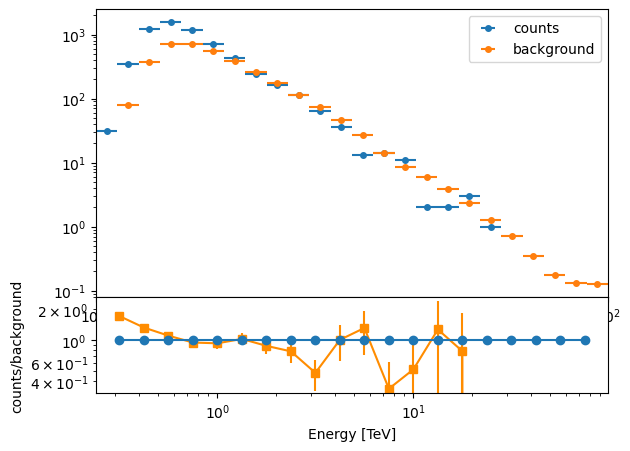

Missing 'HDUCLAS2' keyword assuming 'BKG'


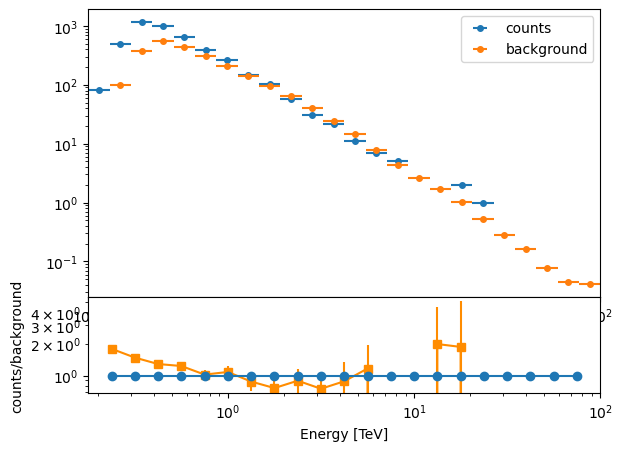

Missing 'HDUCLAS2' keyword assuming 'BKG'


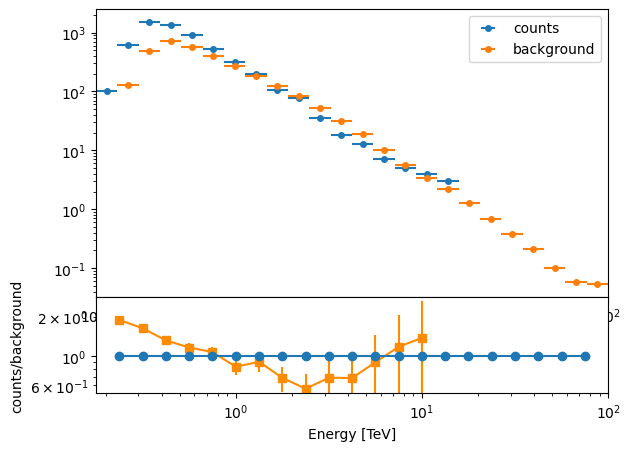

Missing 'HDUCLAS2' keyword assuming 'BKG'


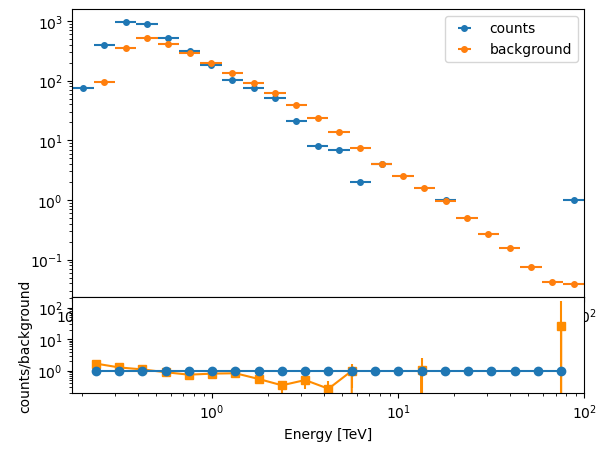

Missing 'HDUCLAS2' keyword assuming 'BKG'


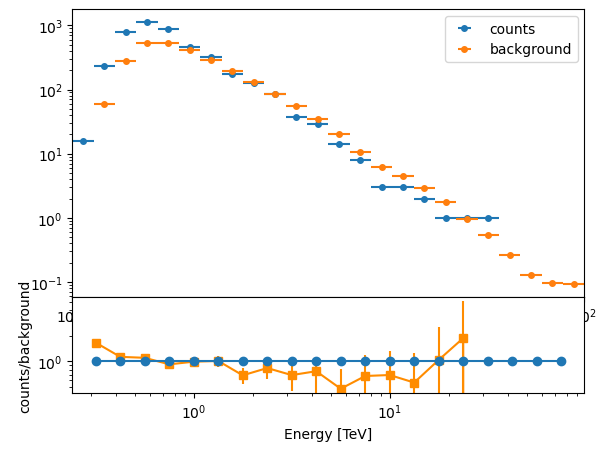

Missing 'HDUCLAS2' keyword assuming 'BKG'


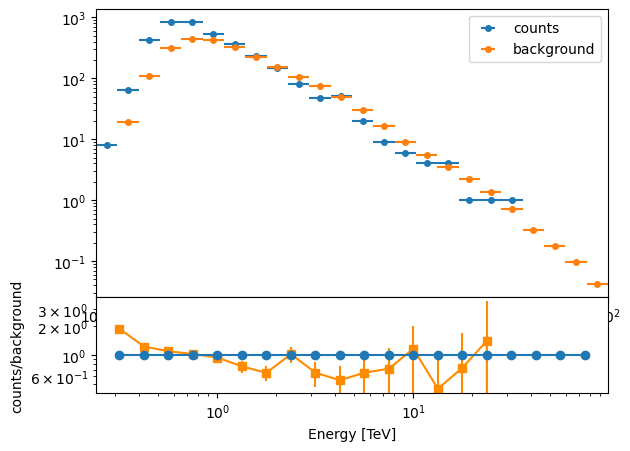

Missing 'HDUCLAS2' keyword assuming 'BKG'


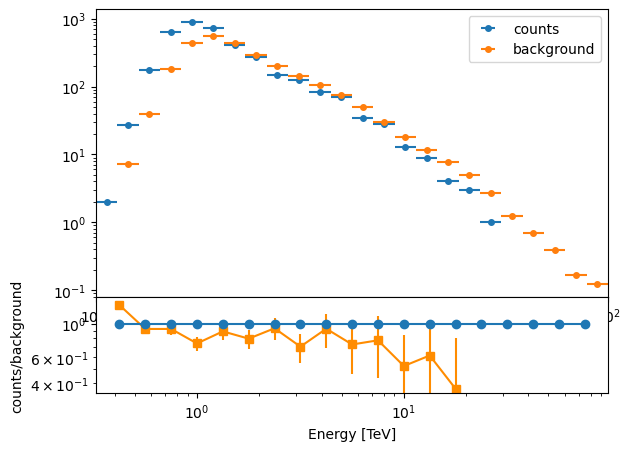

Missing 'HDUCLAS2' keyword assuming 'BKG'


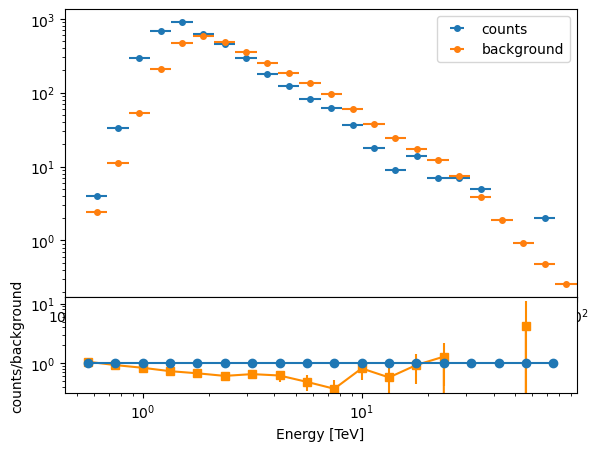

Missing 'HDUCLAS2' keyword assuming 'BKG'


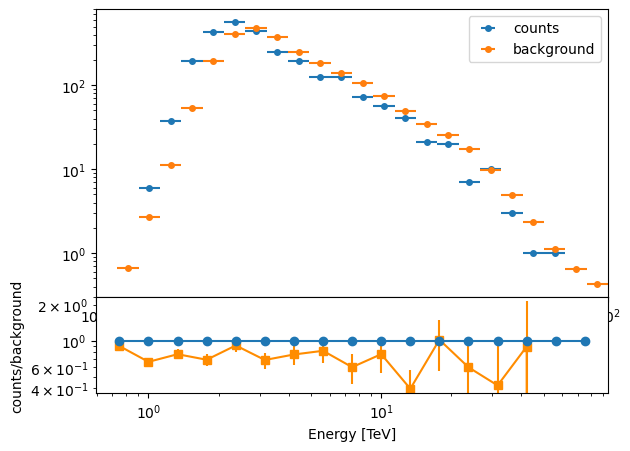

Missing 'HDUCLAS2' keyword assuming 'BKG'


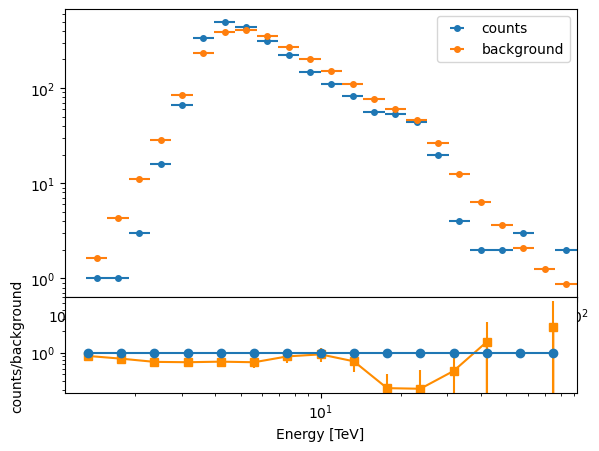

Missing 'HDUCLAS2' keyword assuming 'BKG'


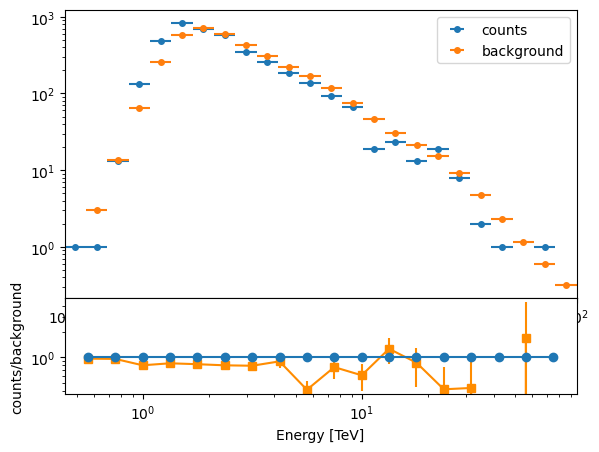

Missing 'HDUCLAS2' keyword assuming 'BKG'


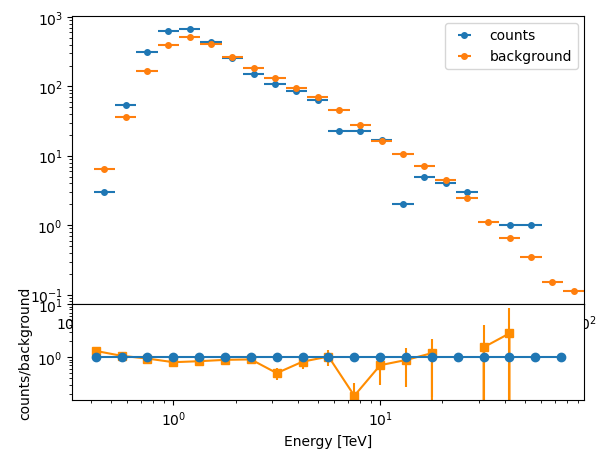

Missing 'HDUCLAS2' keyword assuming 'BKG'


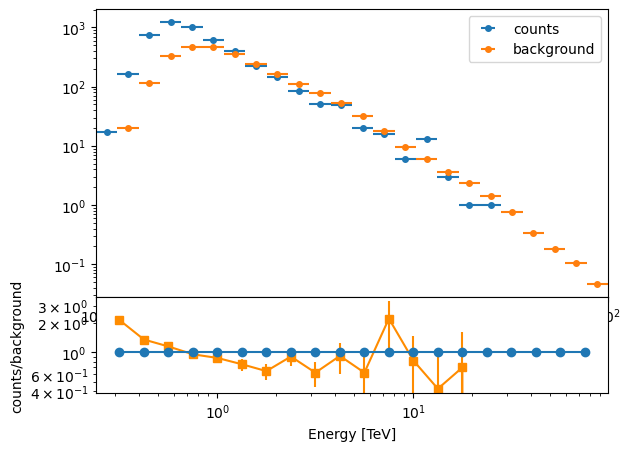

Missing 'HDUCLAS2' keyword assuming 'BKG'


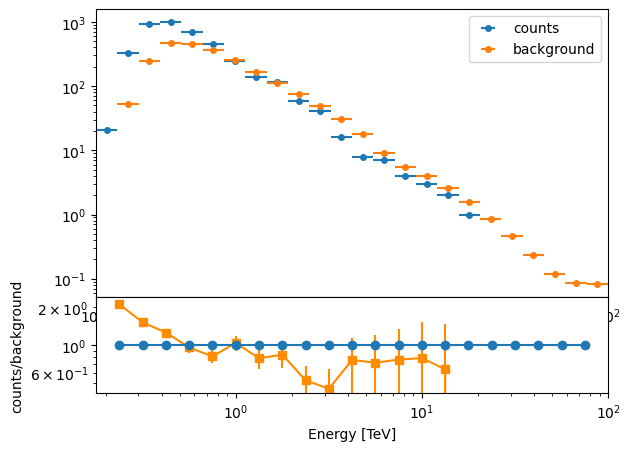

Missing 'HDUCLAS2' keyword assuming 'BKG'


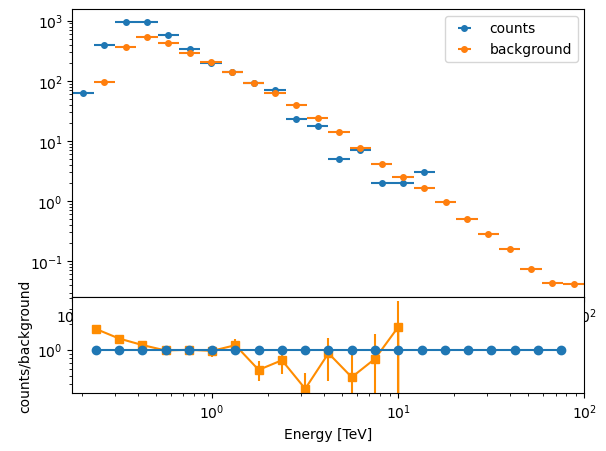

Missing 'HDUCLAS2' keyword assuming 'BKG'


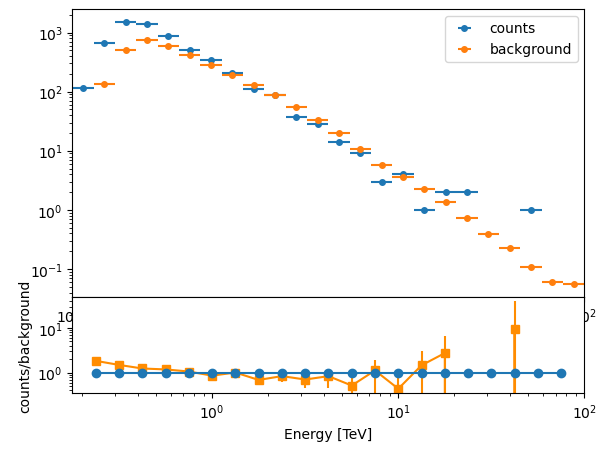

Missing 'HDUCLAS2' keyword assuming 'BKG'


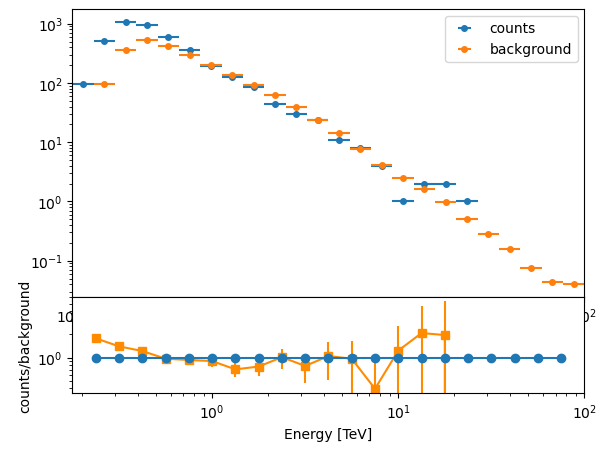

Missing 'HDUCLAS2' keyword assuming 'BKG'


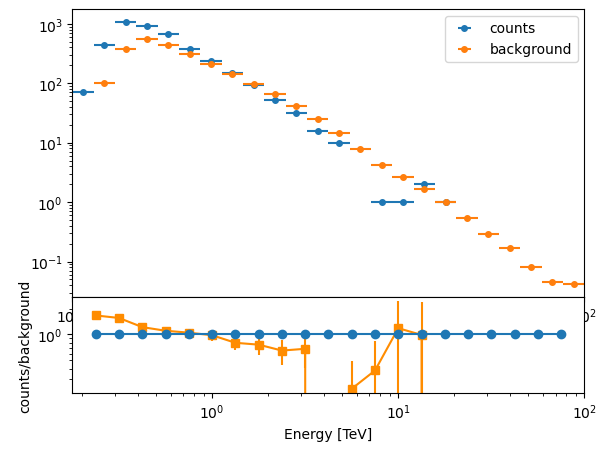

Missing 'HDUCLAS2' keyword assuming 'BKG'


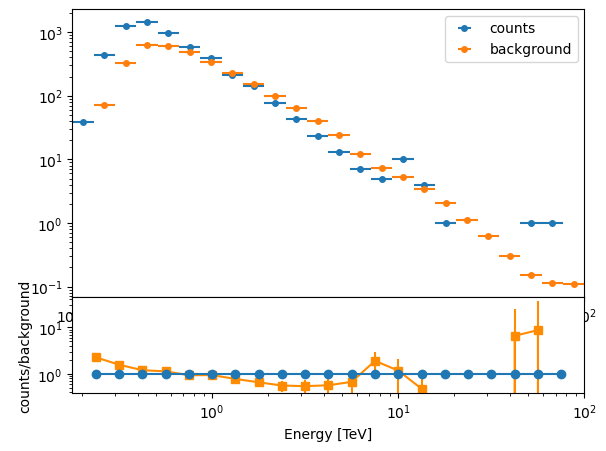

Missing 'HDUCLAS2' keyword assuming 'BKG'


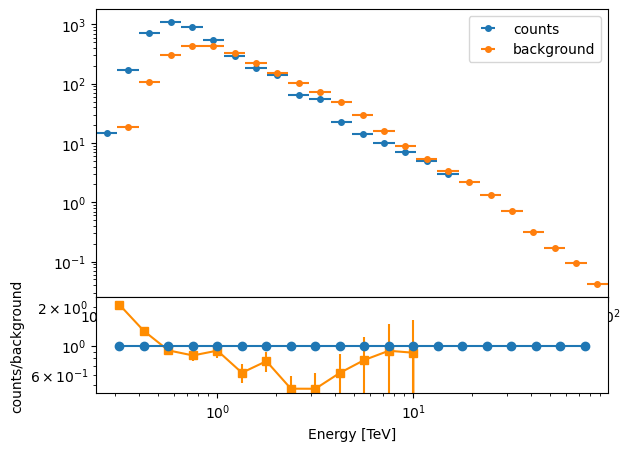

Missing 'HDUCLAS2' keyword assuming 'BKG'


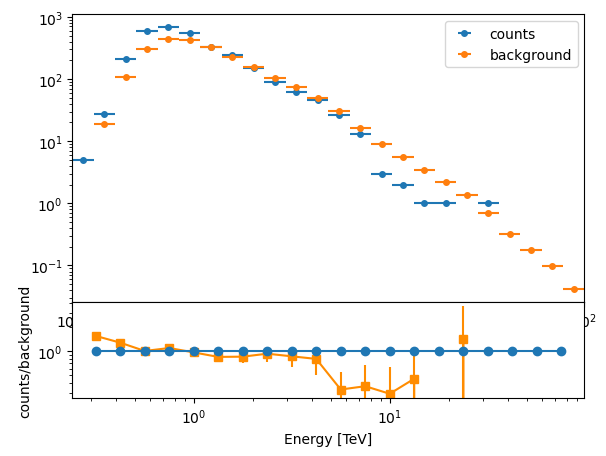

Missing 'HDUCLAS2' keyword assuming 'BKG'


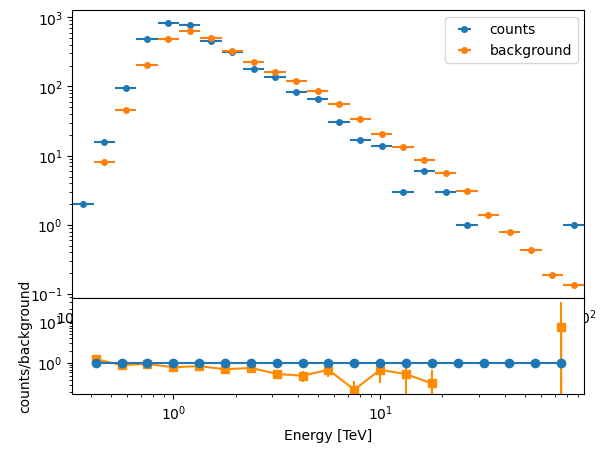

Missing 'HDUCLAS2' keyword assuming 'BKG'


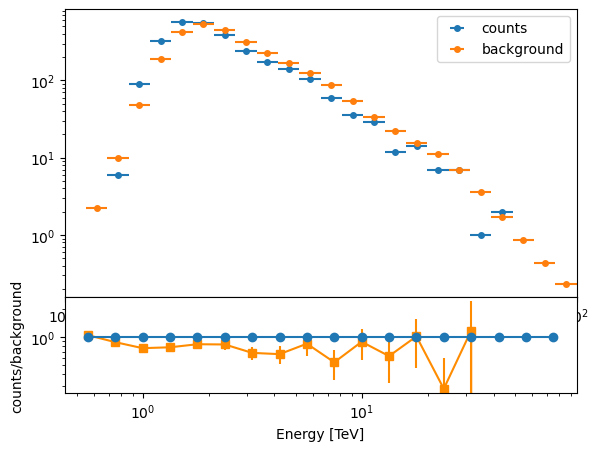

Missing 'HDUCLAS2' keyword assuming 'BKG'


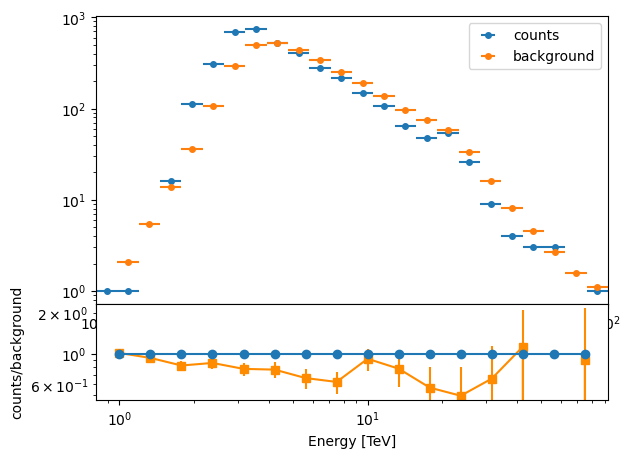

Missing 'HDUCLAS2' keyword assuming 'BKG'


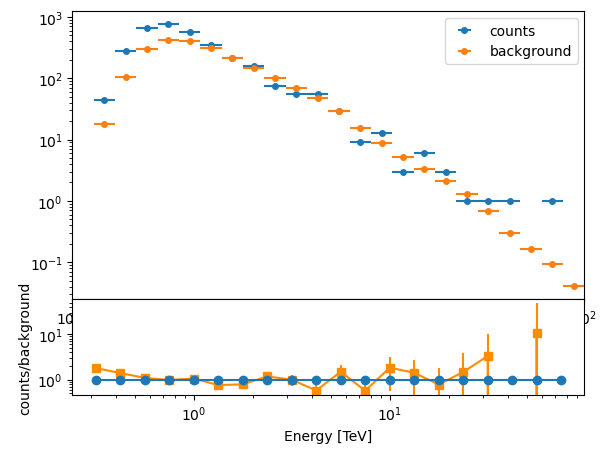

Missing 'HDUCLAS2' keyword assuming 'BKG'


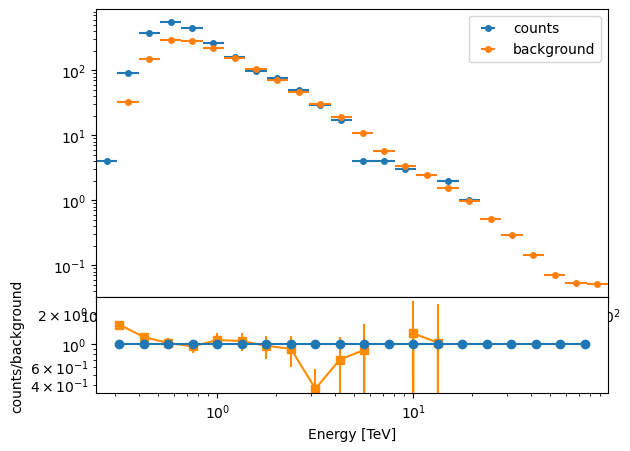

Missing 'HDUCLAS2' keyword assuming 'BKG'


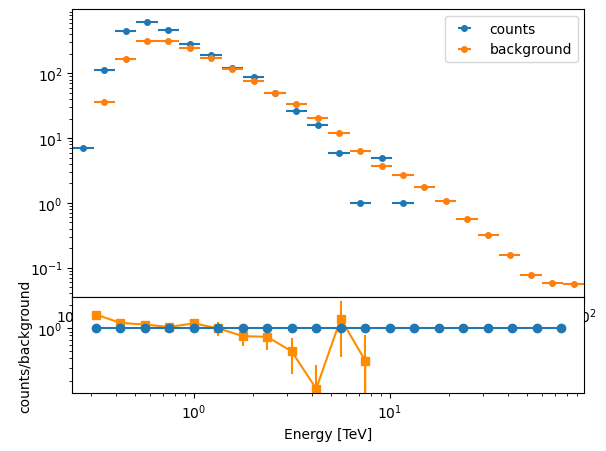

Missing 'HDUCLAS2' keyword assuming 'BKG'


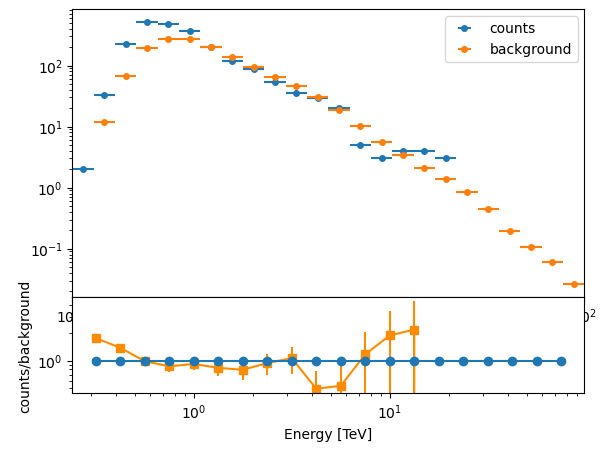

Missing 'HDUCLAS2' keyword assuming 'BKG'


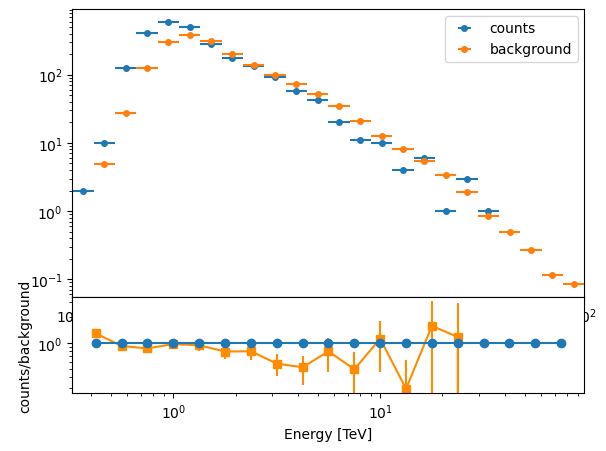

Missing 'HDUCLAS2' keyword assuming 'BKG'


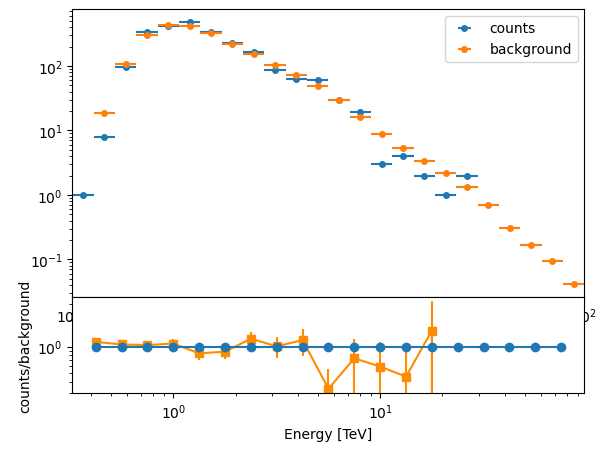

Missing 'HDUCLAS2' keyword assuming 'BKG'


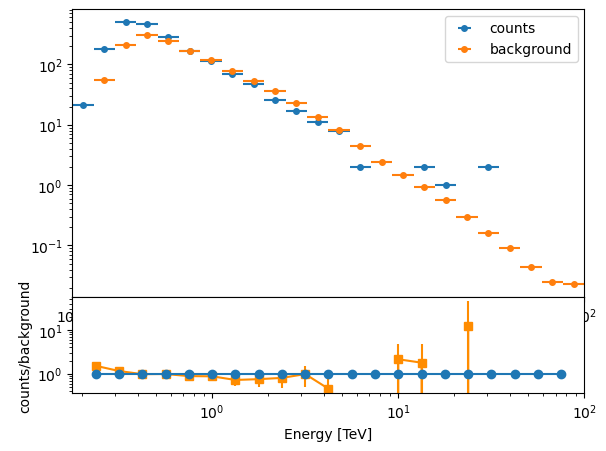

Missing 'HDUCLAS2' keyword assuming 'BKG'


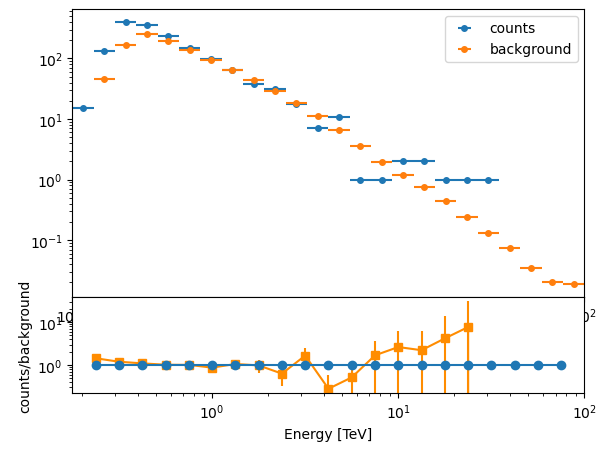

Missing 'HDUCLAS2' keyword assuming 'BKG'


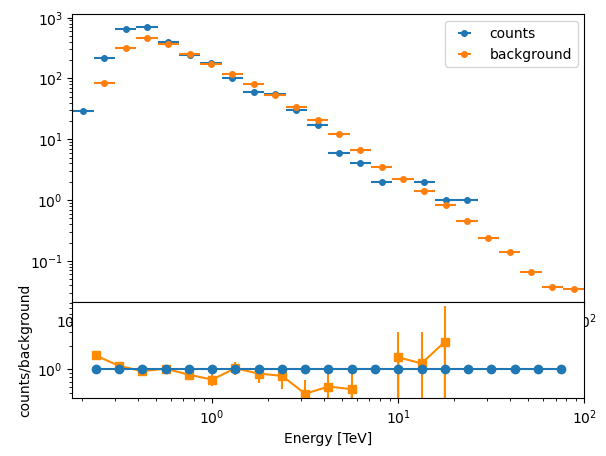

Missing 'HDUCLAS2' keyword assuming 'BKG'


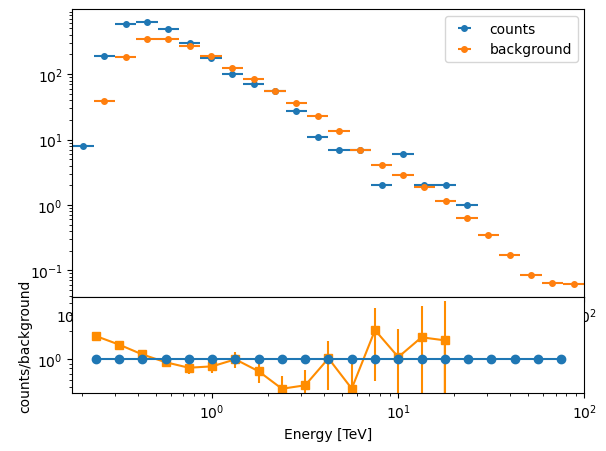

Missing 'HDUCLAS2' keyword assuming 'BKG'


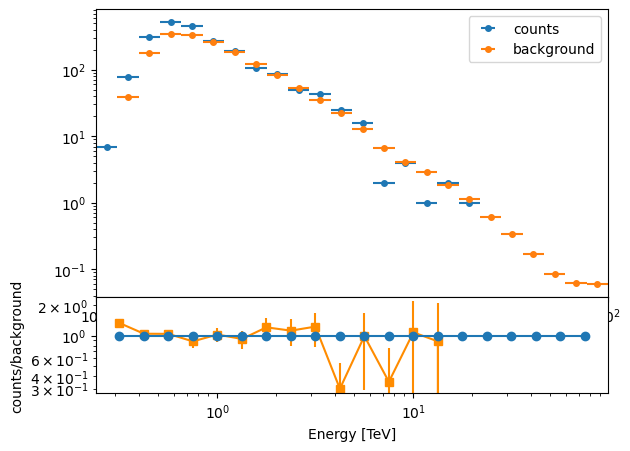

Missing 'HDUCLAS2' keyword assuming 'BKG'


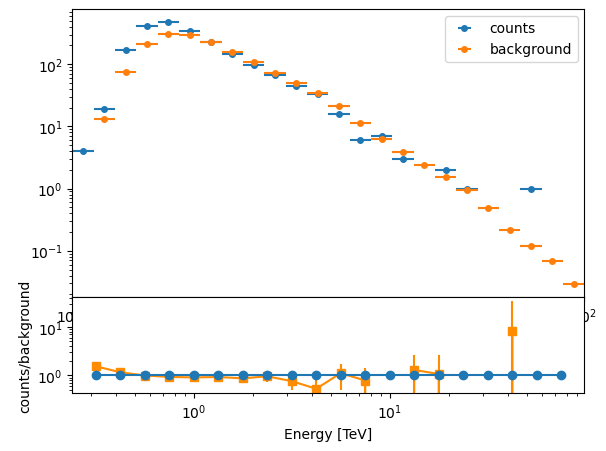

Missing 'HDUCLAS2' keyword assuming 'BKG'


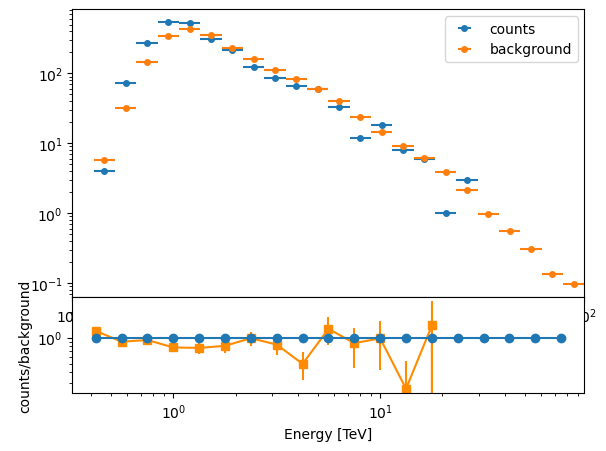

Missing 'HDUCLAS2' keyword assuming 'BKG'


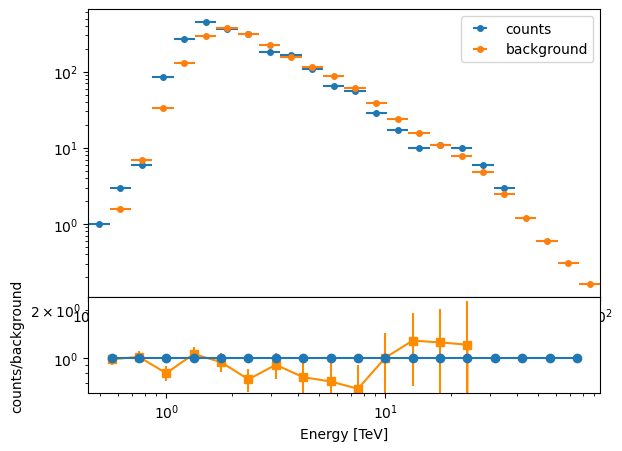

Missing 'HDUCLAS2' keyword assuming 'BKG'


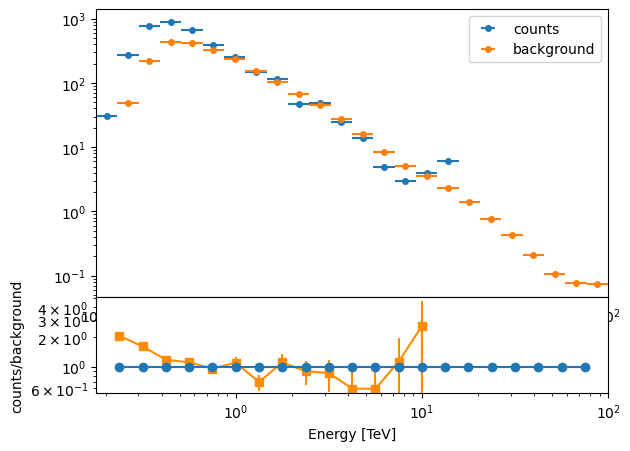

Missing 'HDUCLAS2' keyword assuming 'BKG'


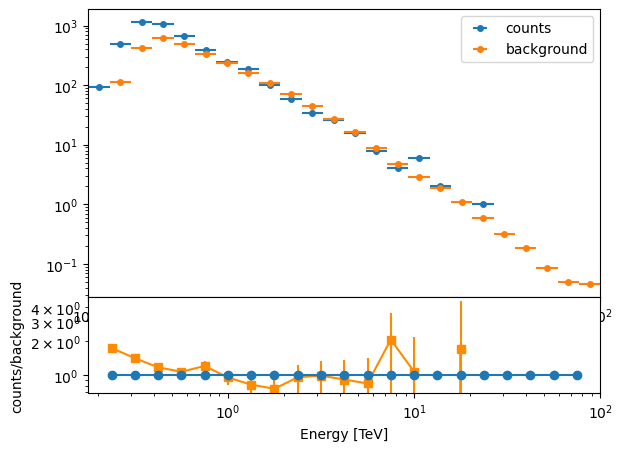

Missing 'HDUCLAS2' keyword assuming 'BKG'


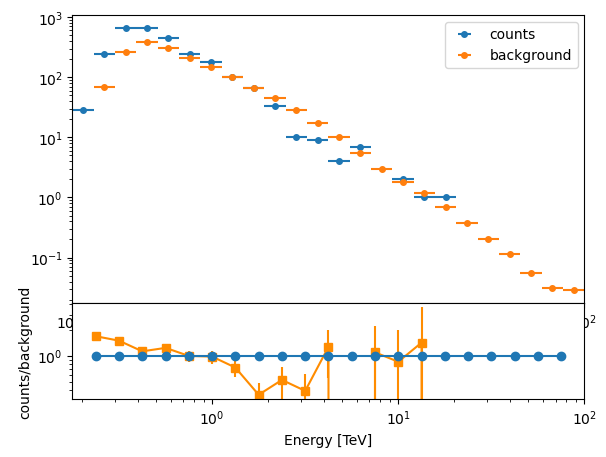

Missing 'HDUCLAS2' keyword assuming 'BKG'


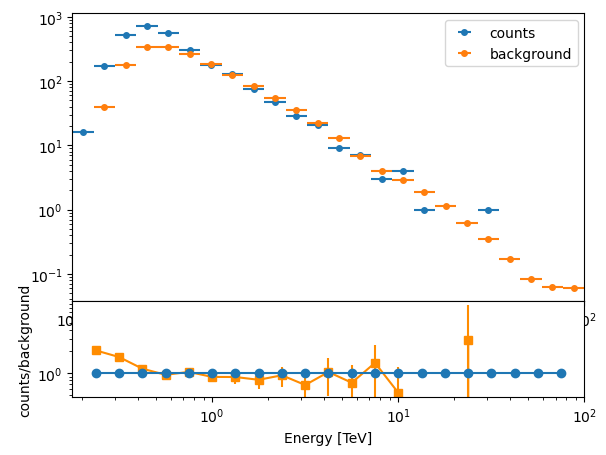

Missing 'HDUCLAS2' keyword assuming 'BKG'


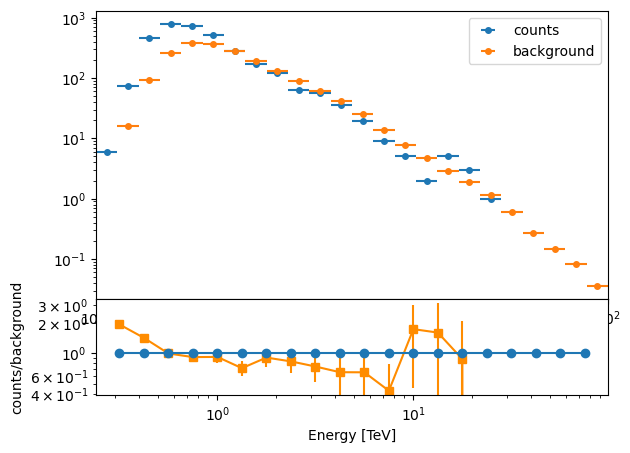

Missing 'HDUCLAS2' keyword assuming 'BKG'


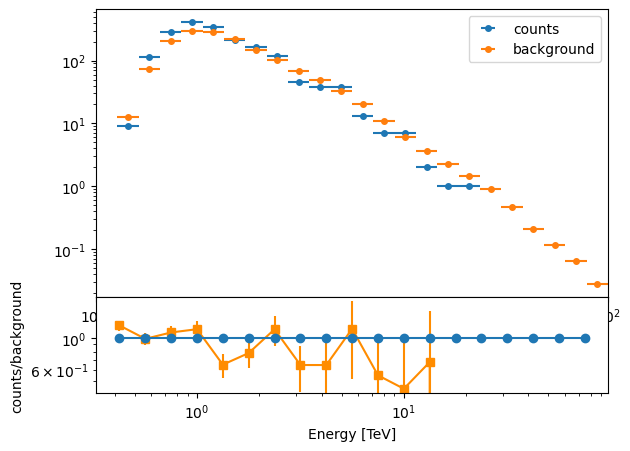

Missing 'HDUCLAS2' keyword assuming 'BKG'


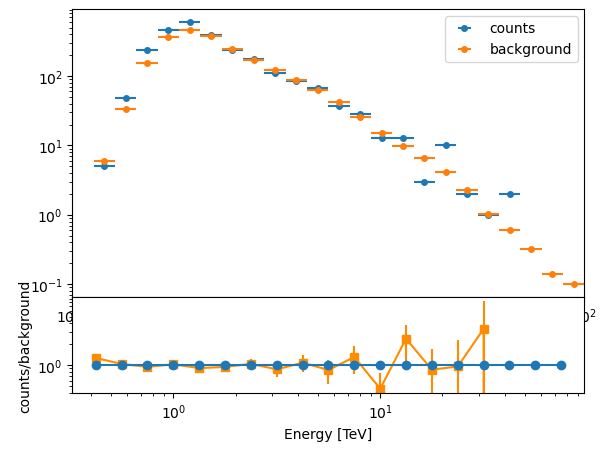

Missing 'HDUCLAS2' keyword assuming 'BKG'


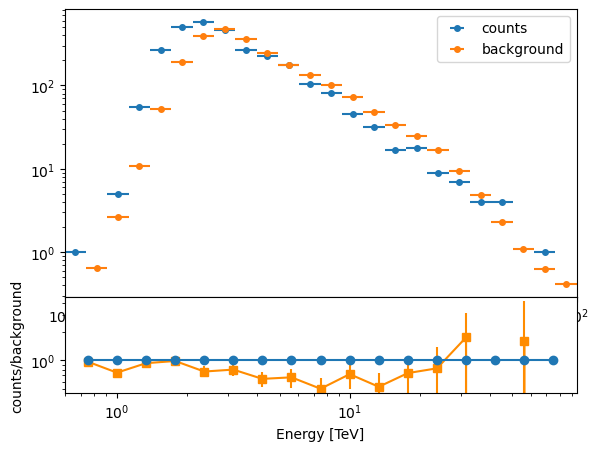

Missing 'HDUCLAS2' keyword assuming 'BKG'


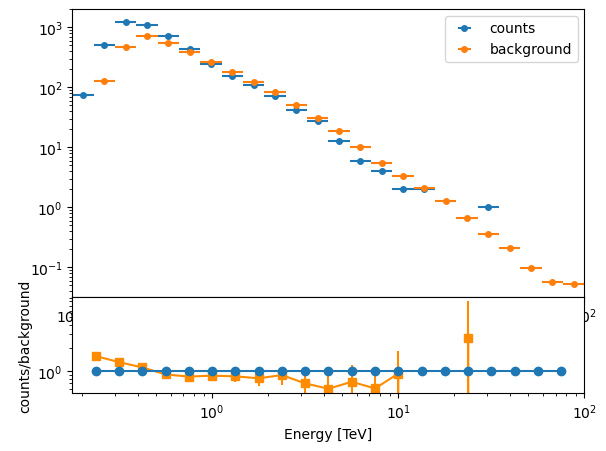

Missing 'HDUCLAS2' keyword assuming 'BKG'


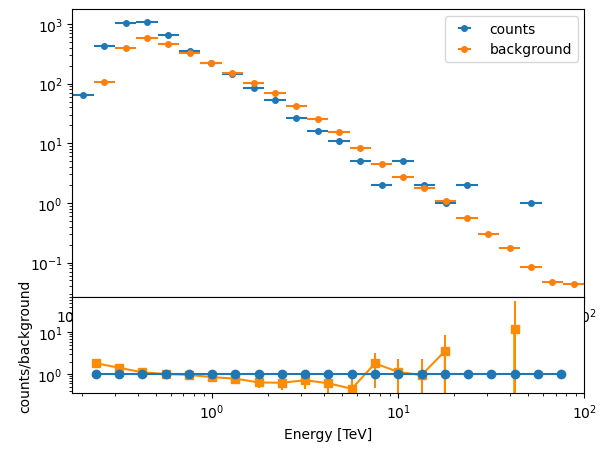

Missing 'HDUCLAS2' keyword assuming 'BKG'


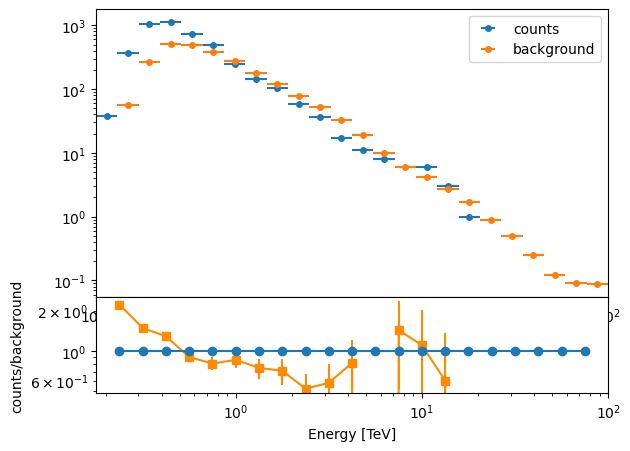

Missing 'HDUCLAS2' keyword assuming 'BKG'


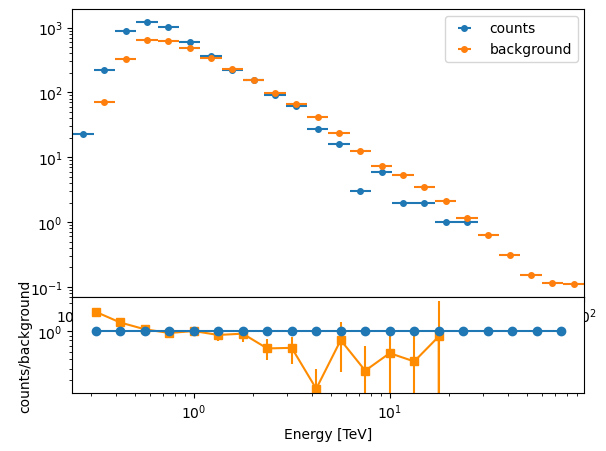

Missing 'HDUCLAS2' keyword assuming 'BKG'


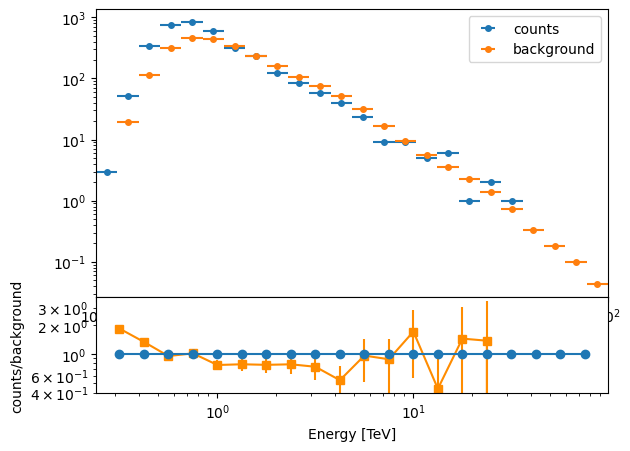

Missing 'HDUCLAS2' keyword assuming 'BKG'


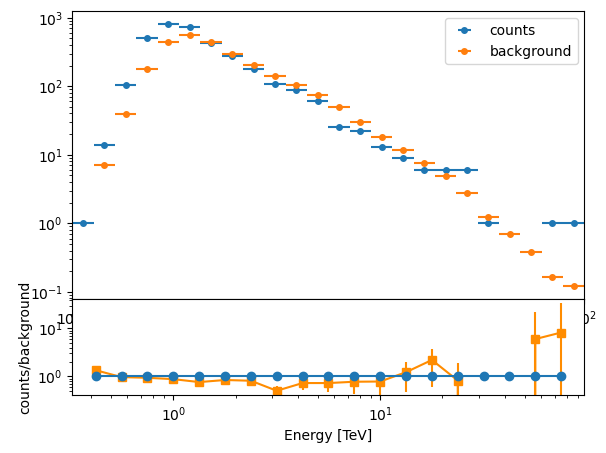

Missing 'HDUCLAS2' keyword assuming 'BKG'


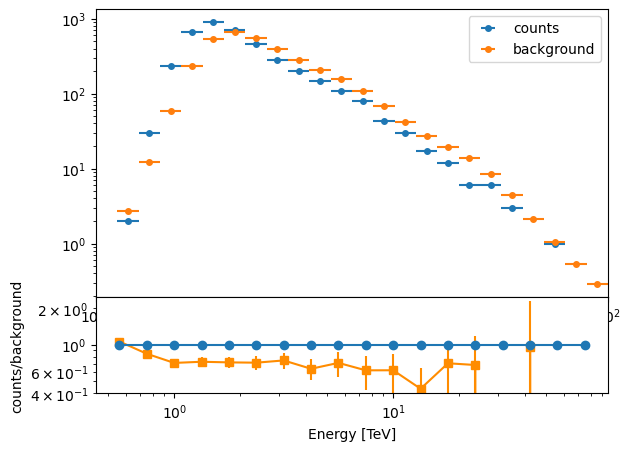

Missing 'HDUCLAS2' keyword assuming 'BKG'


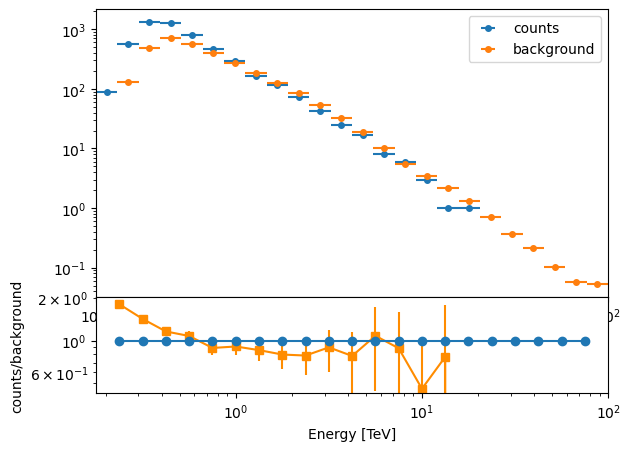

Missing 'HDUCLAS2' keyword assuming 'BKG'


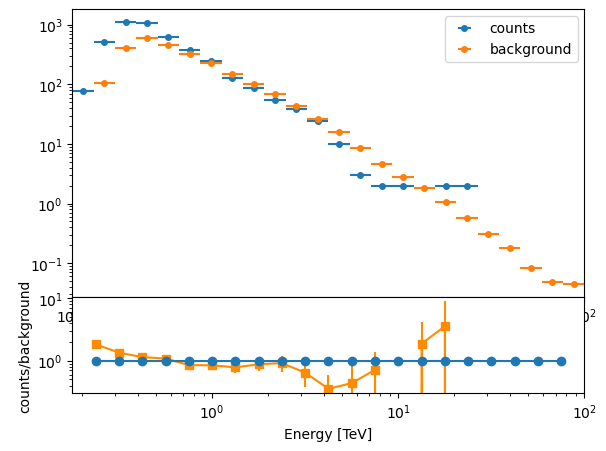

Missing 'HDUCLAS2' keyword assuming 'BKG'


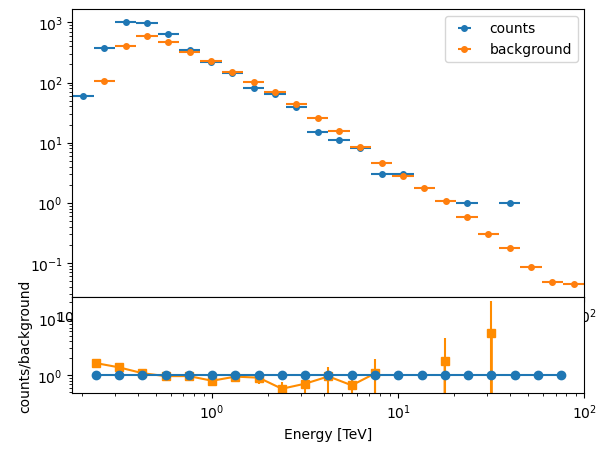

Missing 'HDUCLAS2' keyword assuming 'BKG'


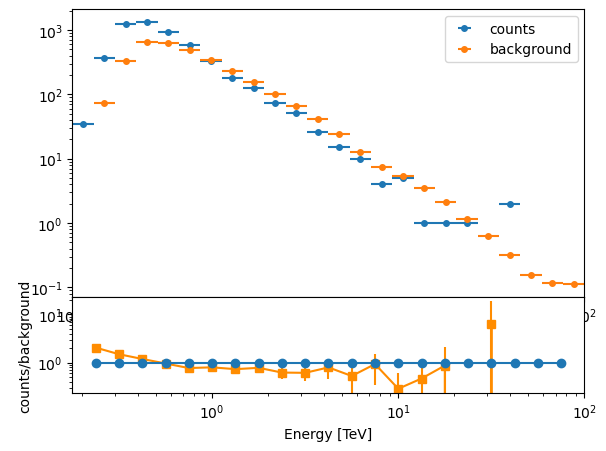

Missing 'HDUCLAS2' keyword assuming 'BKG'


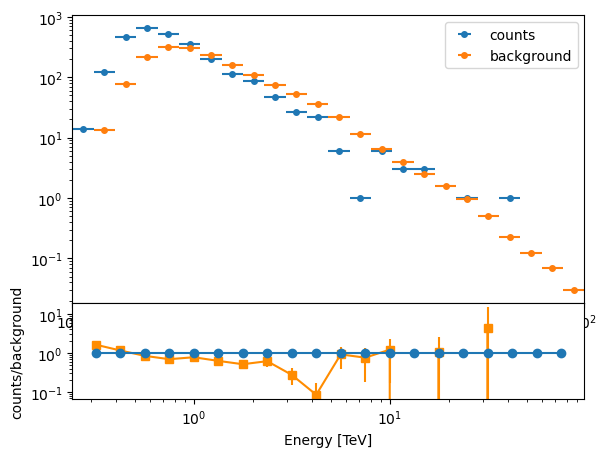

Missing 'HDUCLAS2' keyword assuming 'BKG'


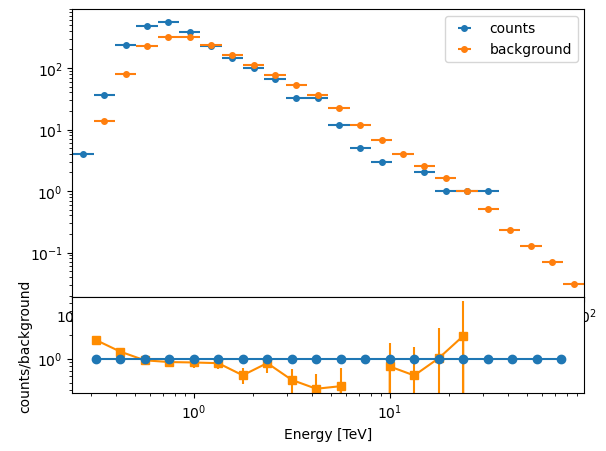

Missing 'HDUCLAS2' keyword assuming 'BKG'


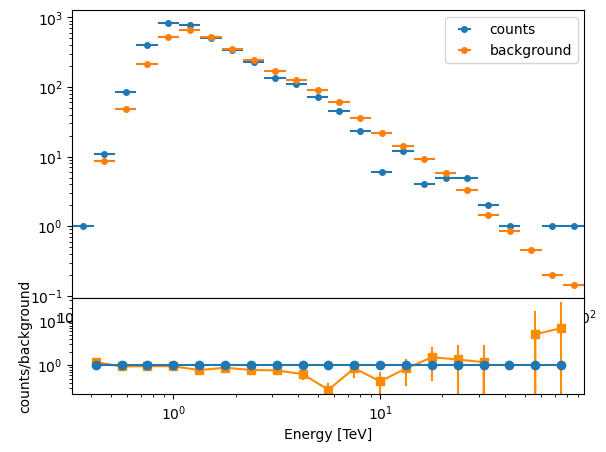

Missing 'HDUCLAS2' keyword assuming 'BKG'


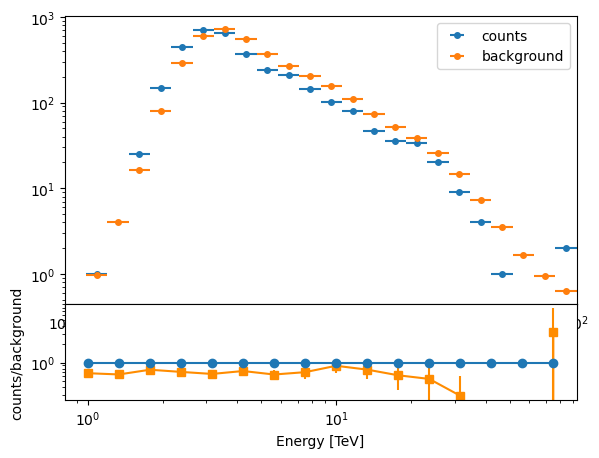

Missing 'HDUCLAS2' keyword assuming 'BKG'


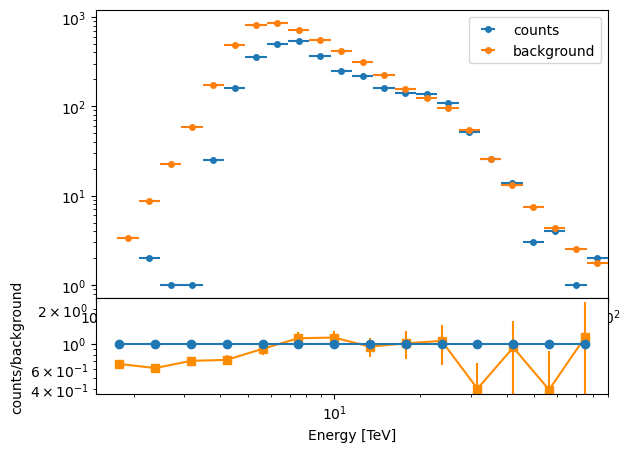

Missing 'HDUCLAS2' keyword assuming 'BKG'


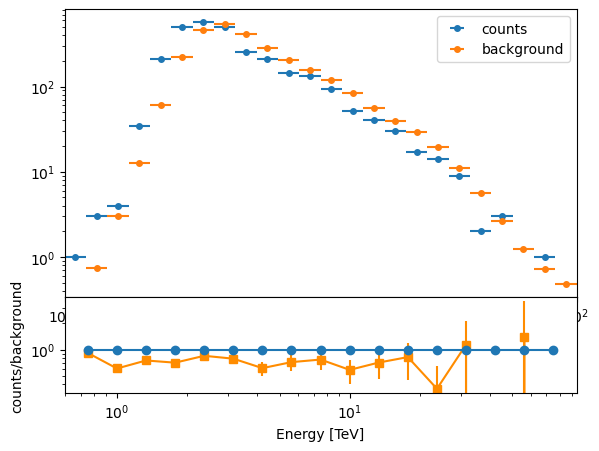

Missing 'HDUCLAS2' keyword assuming 'BKG'


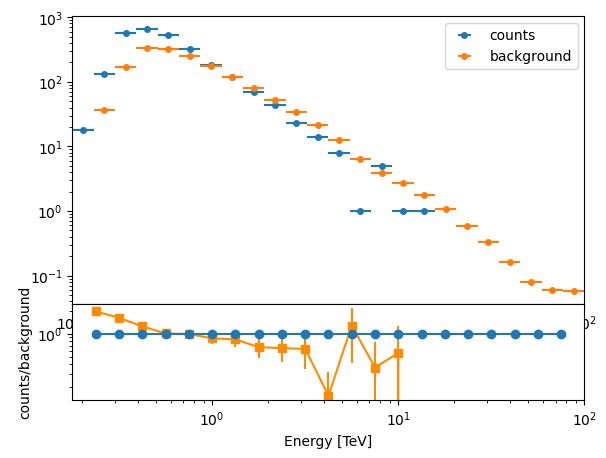

Missing 'HDUCLAS2' keyword assuming 'BKG'


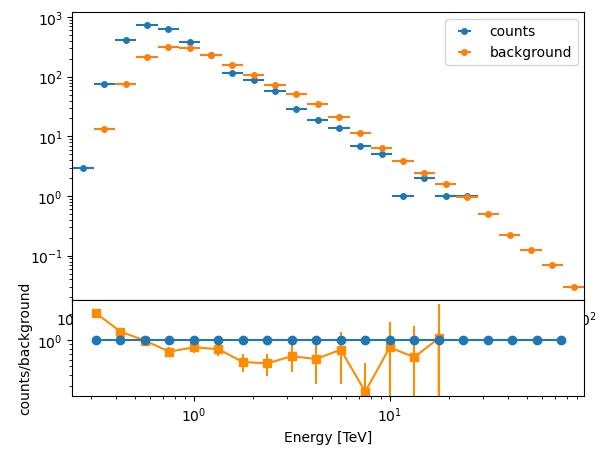

Missing 'HDUCLAS2' keyword assuming 'BKG'


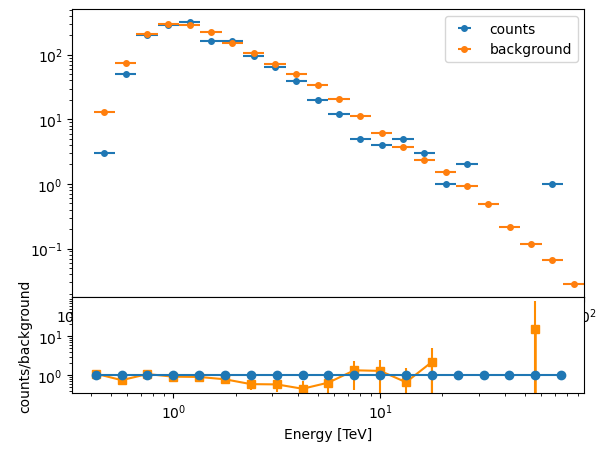

Missing 'HDUCLAS2' keyword assuming 'BKG'


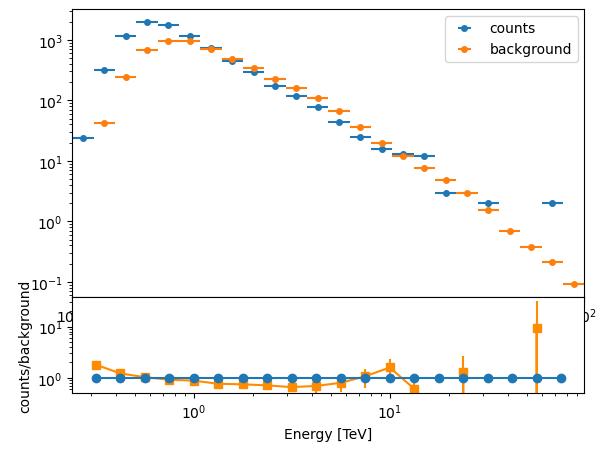

Missing 'HDUCLAS2' keyword assuming 'BKG'


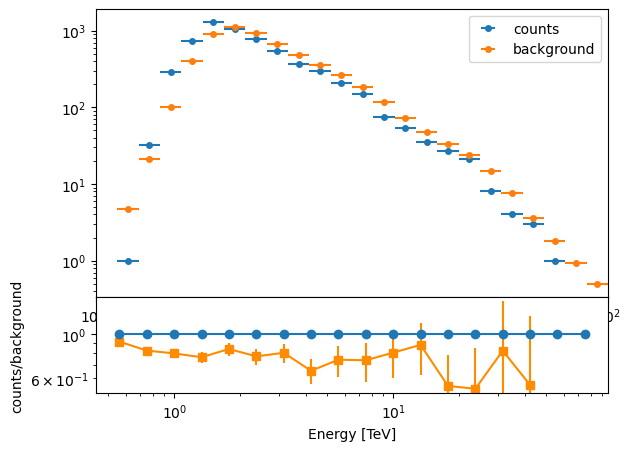

Missing 'HDUCLAS2' keyword assuming 'BKG'


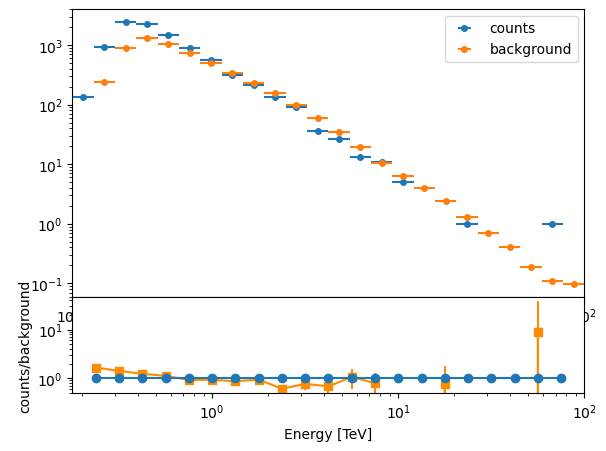

Missing 'HDUCLAS2' keyword assuming 'BKG'


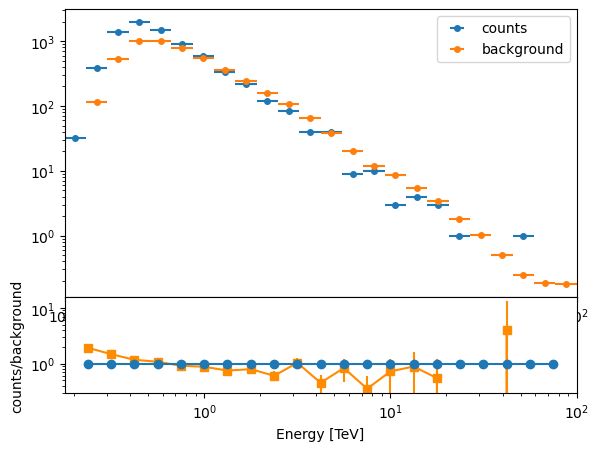

Missing 'HDUCLAS2' keyword assuming 'BKG'


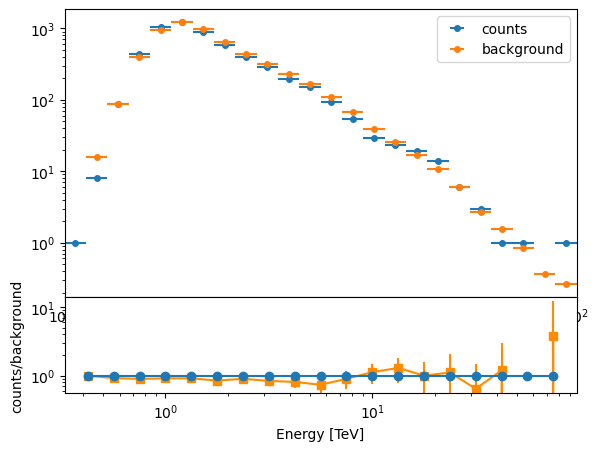

Missing 'HDUCLAS2' keyword assuming 'BKG'


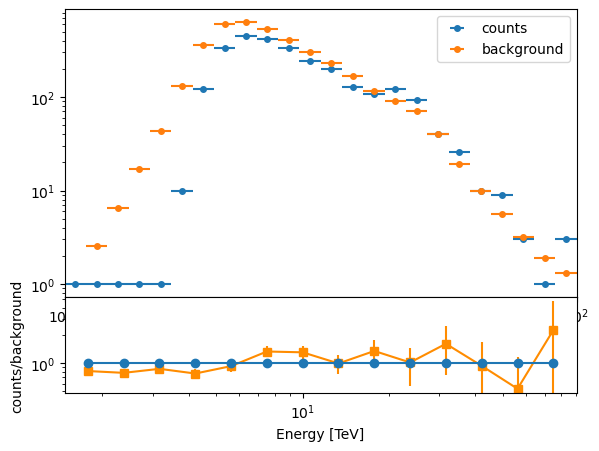

Missing 'HDUCLAS2' keyword assuming 'BKG'


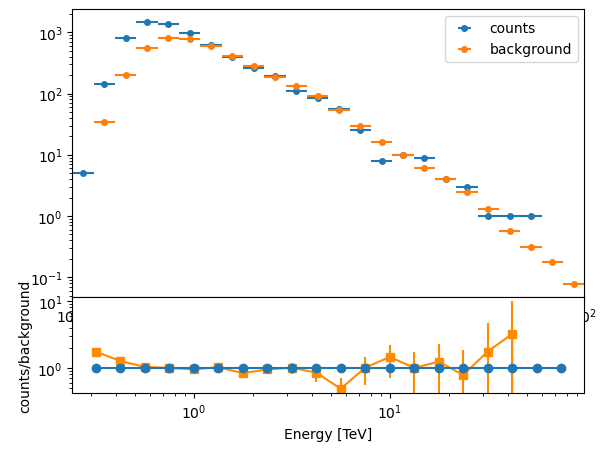

Missing 'HDUCLAS2' keyword assuming 'BKG'


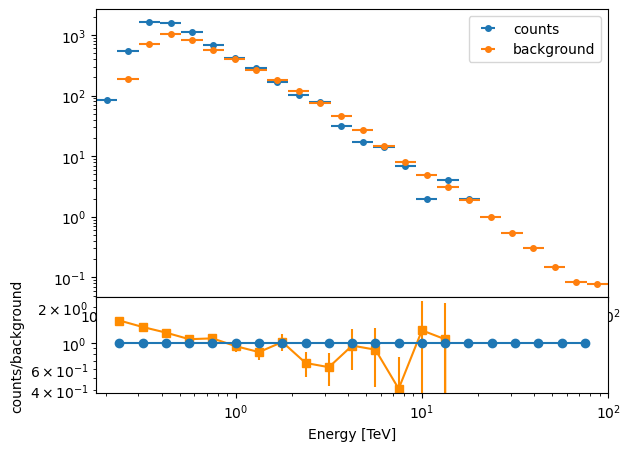

Missing 'HDUCLAS2' keyword assuming 'BKG'


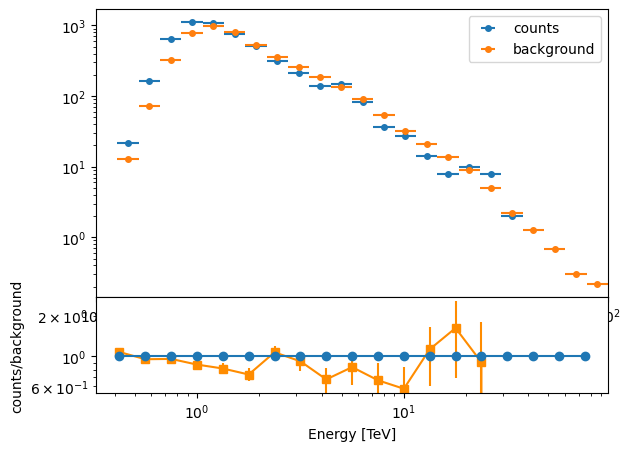

Missing 'HDUCLAS2' keyword assuming 'BKG'


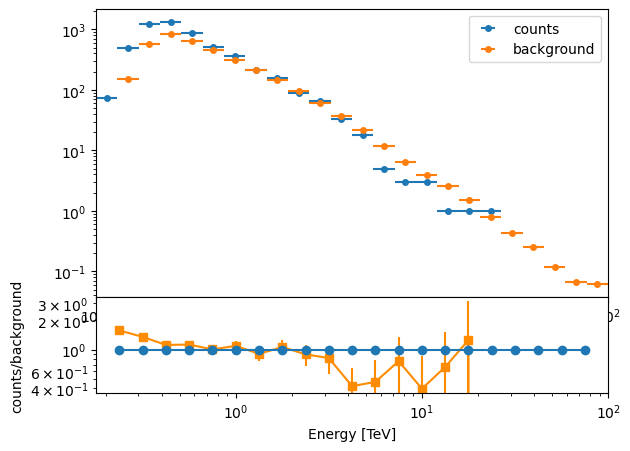

Missing 'HDUCLAS2' keyword assuming 'BKG'


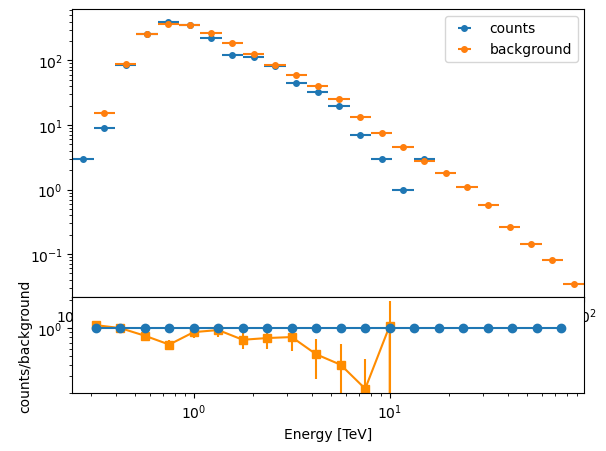

Missing 'HDUCLAS2' keyword assuming 'BKG'


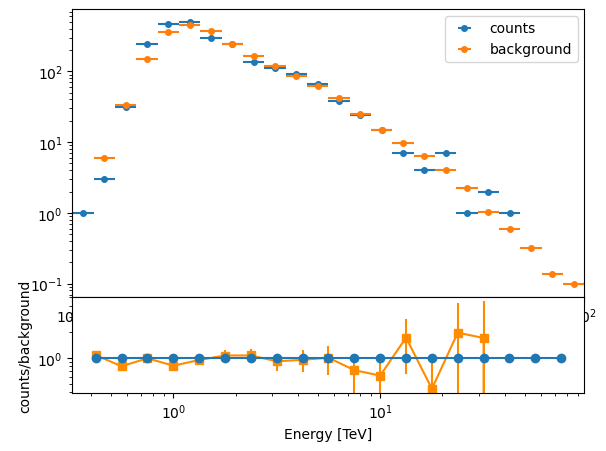

Missing 'HDUCLAS2' keyword assuming 'BKG'


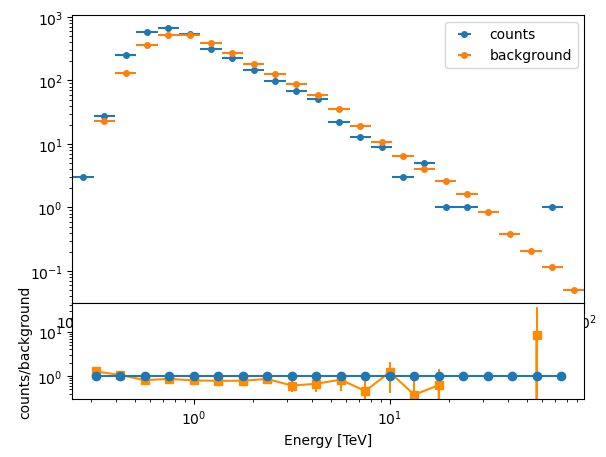

Missing 'HDUCLAS2' keyword assuming 'BKG'


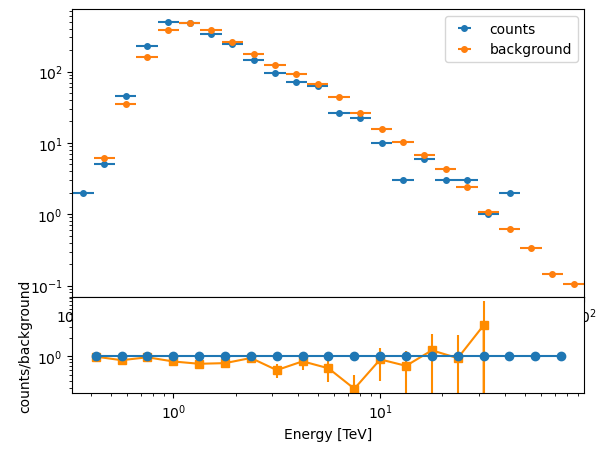

Missing 'HDUCLAS2' keyword assuming 'BKG'


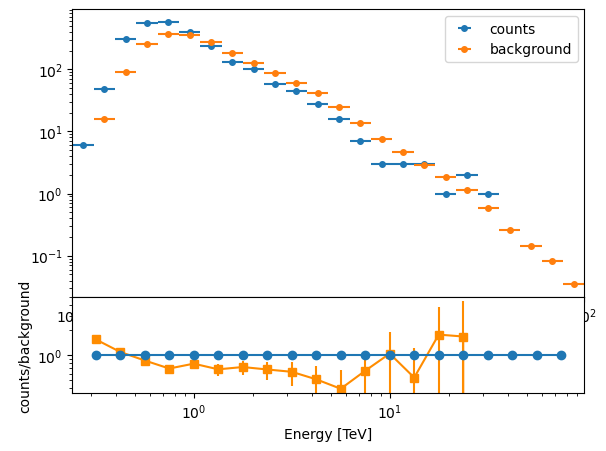

Missing 'HDUCLAS2' keyword assuming 'BKG'


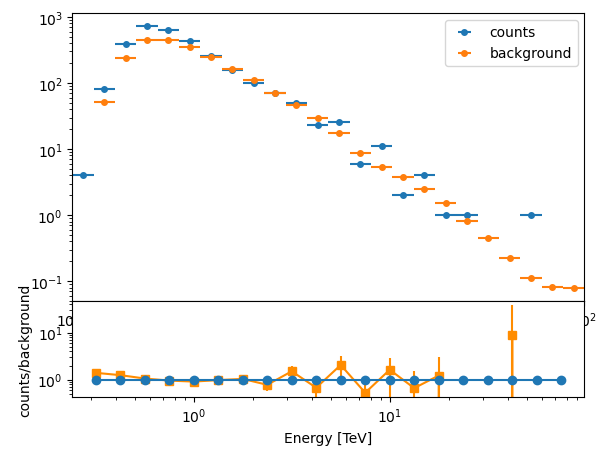

Missing 'HDUCLAS2' keyword assuming 'BKG'


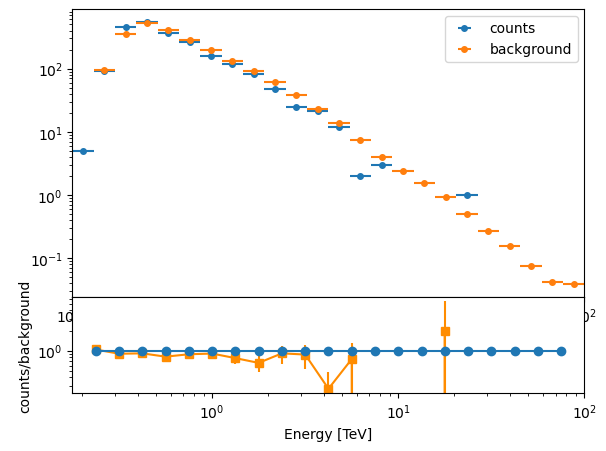

Missing 'HDUCLAS2' keyword assuming 'BKG'


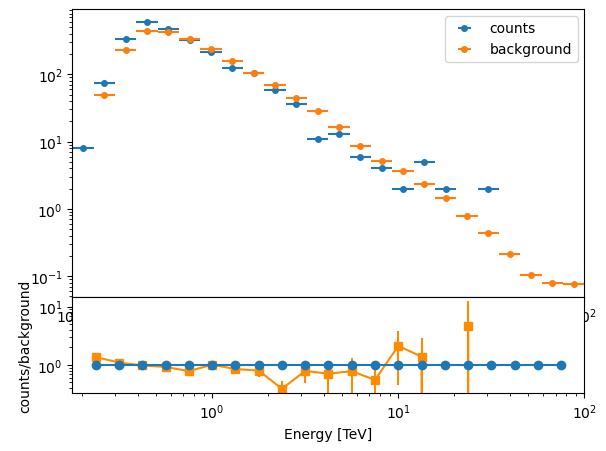

Missing 'HDUCLAS2' keyword assuming 'BKG'


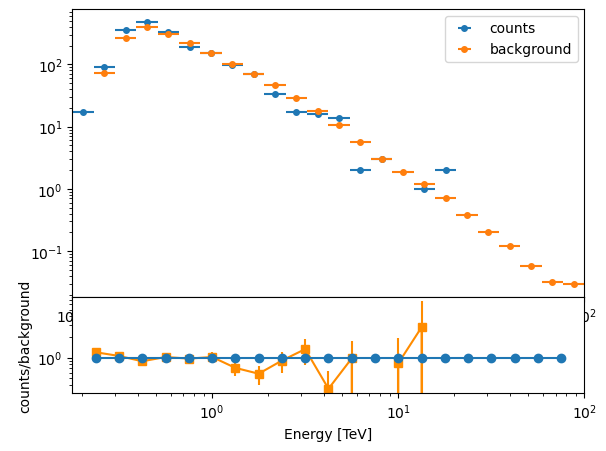

Missing 'HDUCLAS2' keyword assuming 'BKG'


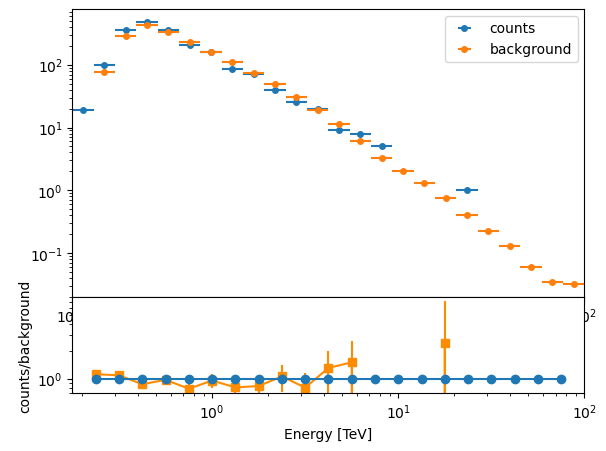

Missing 'HDUCLAS2' keyword assuming 'BKG'


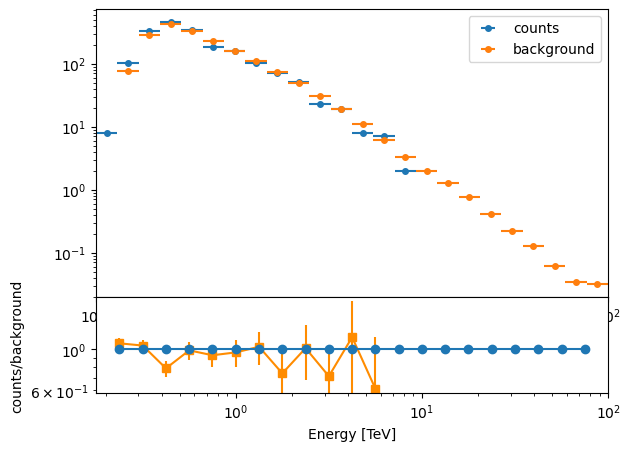

Missing 'HDUCLAS2' keyword assuming 'BKG'


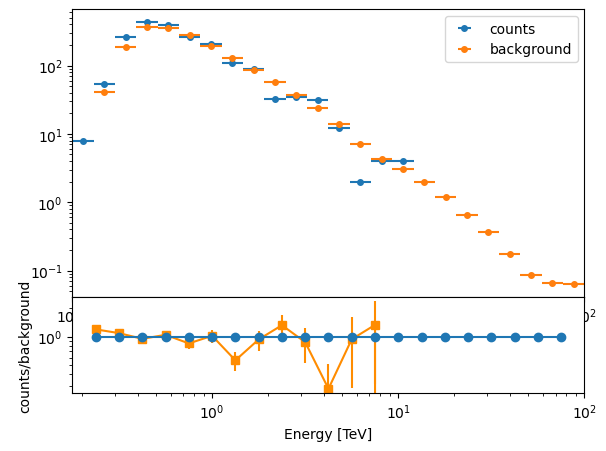

Missing 'HDUCLAS2' keyword assuming 'BKG'


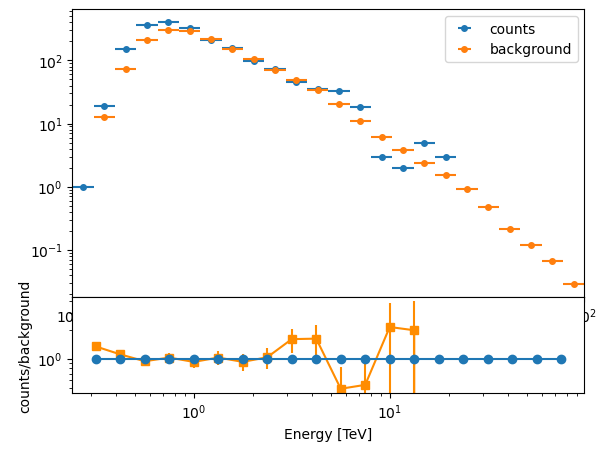

Missing 'HDUCLAS2' keyword assuming 'BKG'


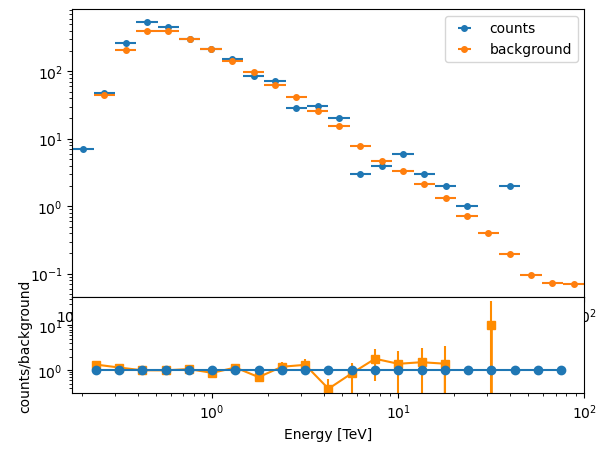

Missing 'HDUCLAS2' keyword assuming 'BKG'


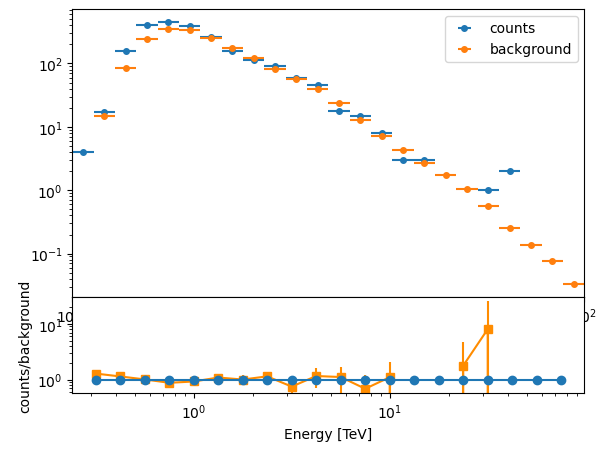

Missing 'HDUCLAS2' keyword assuming 'BKG'


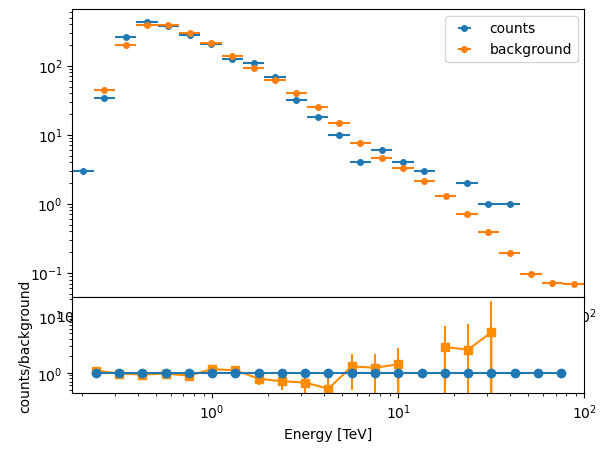

Missing 'HDUCLAS2' keyword assuming 'BKG'


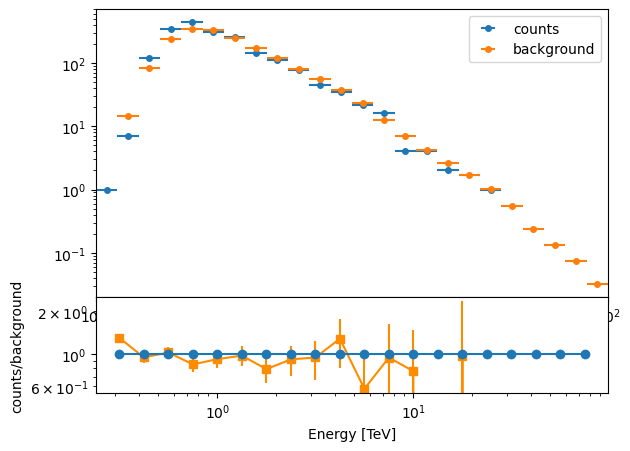

Missing 'HDUCLAS2' keyword assuming 'BKG'


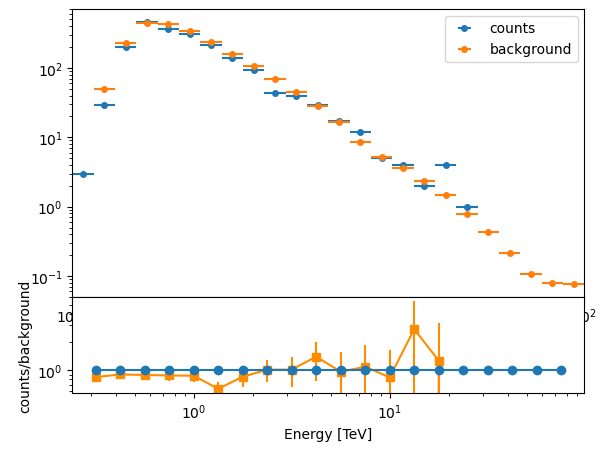

Missing 'HDUCLAS2' keyword assuming 'BKG'


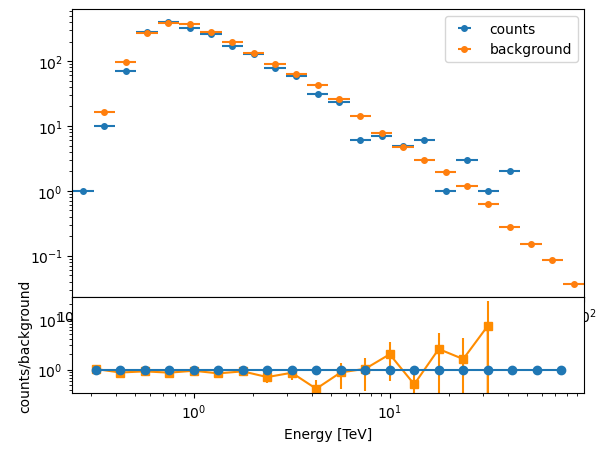

Missing 'HDUCLAS2' keyword assuming 'BKG'


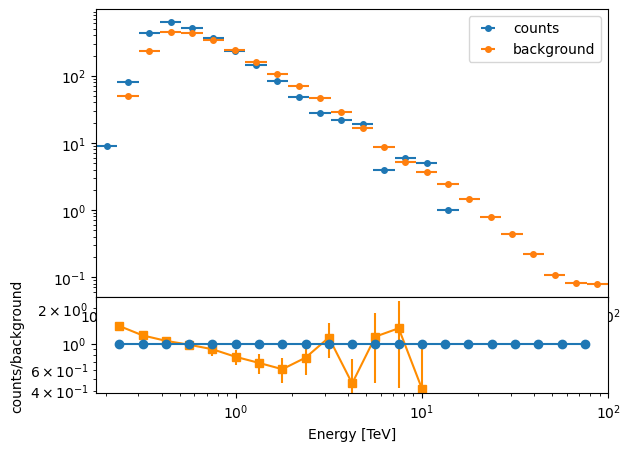

Missing 'HDUCLAS2' keyword assuming 'BKG'


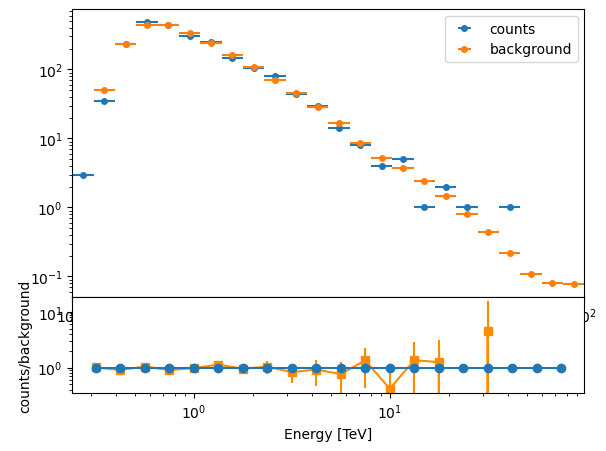

Missing 'HDUCLAS2' keyword assuming 'BKG'


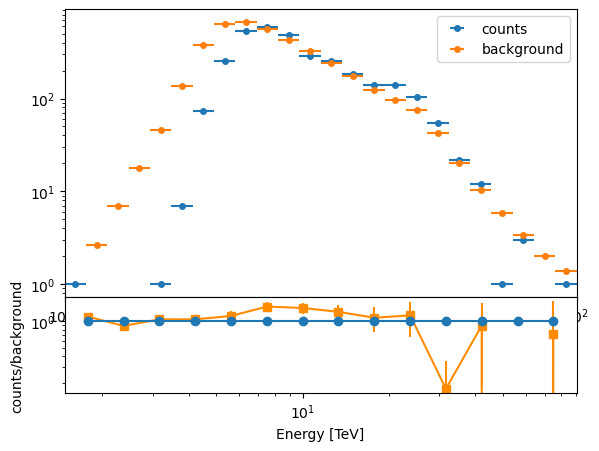

Missing 'HDUCLAS2' keyword assuming 'BKG'


IndexError: index 184 is out of bounds for axis 0 with size 184

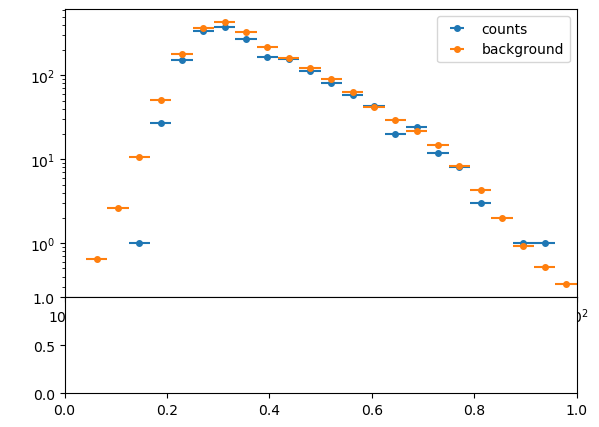

In [110]:
stacked_dataset = compute_empty_dataset(geom)

parameter = []
residuals = []
maker = MapDatasetMaker()
maker_safe_mask = SafeMaskMaker(
    methods=["offset-max", 'edisp-bias', "bkg-peak"],
    offset_max= 2.0 * u.deg,
    bias_percent=10
)

for obs in obs_list:

    zenith = ds.obs_table[ds.obs_table['OBS_ID']==obs.obs_id]["ZEN_PNT"]
    
    cutout = stacked_dataset.cutout(
        obs.pointing.fixed_icrs,
        width=2 * 2.0 * u.deg,
        name=f"obs-{obs.obs_id}"
    )
    
    maker_fov, ex = get_exclusion_mask()
    
            
    dataset = maker.run(cutout, obs)
    dataset = maker_safe_mask.run(dataset, obs)   
    
    # fit background model
    bkg_model = FoVBackgroundModel(dataset_name=dataset.name)
    dataset.models=bkg_model
    dataset.background_model.spectral_model.tilt.frozen = False
    dataset = maker_fov.run(dataset)

    #Debugging
    estimator_001 = ExcessMapEstimator(
    correlation_radius="0.1 deg",
    # energy_edges=[0.3, 50] * u.TeV,
    selection_optional=[],
    )
    lima_maps_001 = estimator_001.run(dataset)
    significance_map_off = lima_maps_001["sqrt_ts"]


    hap_exclusion_regions = get_excluded_regions(significance_map_off.geom.center_coord[0].value, significance_map_off.geom.center_coord[1].value, 5)
    excl_regions = []
    for source in hap_exclusion_regions:
        center = SkyCoord(source.ra, source.dec, unit='deg', frame='icrs')
        region = CircleSkyRegion(center=center, radius=source.radius*u.deg)
        excl_regions.append(region)
                   
    excl_data = significance_map_off.geom.region_mask(regions=excl_regions, inside=False)
    significance_data = significance_map_off * excl_data
    significance_data = significance_data.data[np.isfinite(significance_map_off.data)]
    significance_data = [x for x in significance_data if x!=0]

    mu, std = norm.fit(significance_data)

    
    parameter.append([obs.obs_id, zenith, dataset.background_model.spectral_model.norm.value, dataset.background_model.spectral_model.tilt.value, mu])

    #residuals:
    fig1 = plt.figure(1)
    frame1=fig1.add_axes((.1,.3,.8,.6))
    dataset.counts.get_spectrum().plot(label='counts')
    dataset.background.get_spectrum().plot(label='background')
    plt.legend()
    frame2=fig1.add_axes((.1,.1,.8,.2))

    def test():
        for i in range(0,24):
            for j in range(0,200):
                for m in range(0,200):
                    if dataset.mask_safe.data[i][j][m] == True:
                        return i
    
    counts_above_thres = []
    for n in range(test(), len(dataset.counts.get_spectrum().data)):
        counts_above_thres.append(dataset.counts.get_spectrum().data[n][0][0])
    
    bkg_above_thres = []
    for k in range(test(), len(dataset.background.get_spectrum().data)):
        bkg_above_thres.append(dataset.background.get_spectrum().data[k][0][0])
    
    res = [i / j for i, j in zip(counts_above_thres, bkg_above_thres)]
    res2 = [i / j for i, j in zip(bkg_above_thres, bkg_above_thres)]
    error = [np.sqrt((np.sqrt(i)/j)**2 + ((np.sqrt(j)*i)/(j**2))**2) for i, j in zip(counts_above_thres, bkg_above_thres)]
    x = e_reco[test():-1]
    plt.errorbar(x,res, yerr=error, marker='s', color='darkorange')
    plt.errorbar(x, res2, marker='o')
    residuals.append([obs.obs_id, zenith, x, res, res2])
    plt.loglog()
    plt.xlabel('Energy [TeV]')
    plt.ylabel('counts/background')
    plt.axhline(y=0, color='grey', alpha=0.5)
    plt.show()
    
    
stacked_dataset.stack(dataset)

In [111]:
zen_list = []
norm_list = []
tilt_list = []
mean_list = []
for i in range(0,len(parameter)):
    zen_list.append(parameter[i][1].value[0])
    norm_list.append(parameter[i][2])
    tilt_list.append(parameter[i][3])
    mean_list.append(parameter[i][4])

Text(0, 0.5, 'bkg norm')

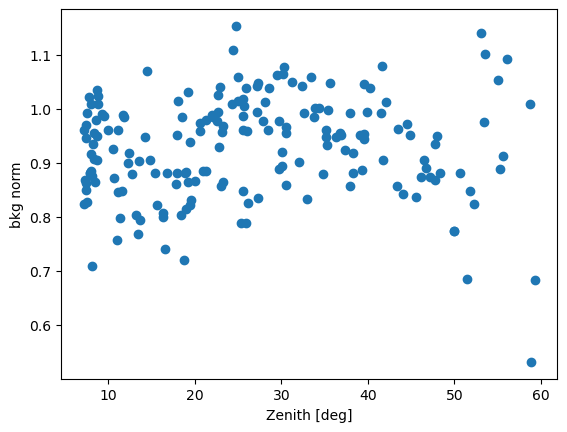

In [112]:
plt.scatter(zen_list, norm_list)
plt.xlabel('Zenith [deg]')
plt.ylabel('bkg norm')

Text(0, 0.5, 'bkg tilt')

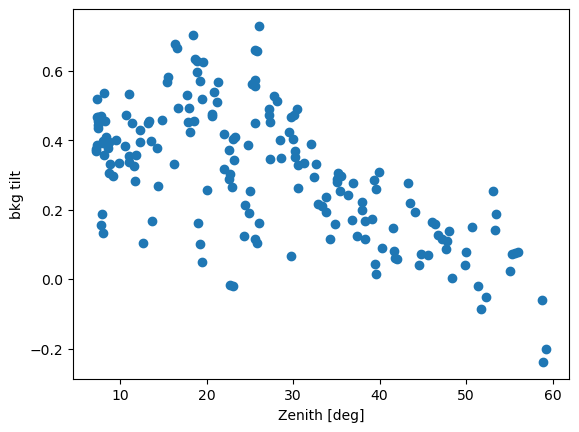

In [113]:
plt.scatter(zen_list, tilt_list)
plt.xlabel('Zenith [deg]')
plt.ylabel('bkg tilt')

In [124]:
intervals = np.linspace(0,60,7)
moving_avg = []
for j in range(0,len(intervals)):
    vals = []
    for i in range(0,len(parameter)): 
        if parameter[i][1].value[0] > intervals[j] and parameter[i][1].value[0] < intervals[j+1]:
            vals.append(parameter[i][4])
    moving_avg.append(np.nanmean(vals))

/tmp/ipykernel_3336240/1175260135.py:8: RuntimeWarning: Mean of empty slice
  moving_avg.append(np.nanmean(vals))


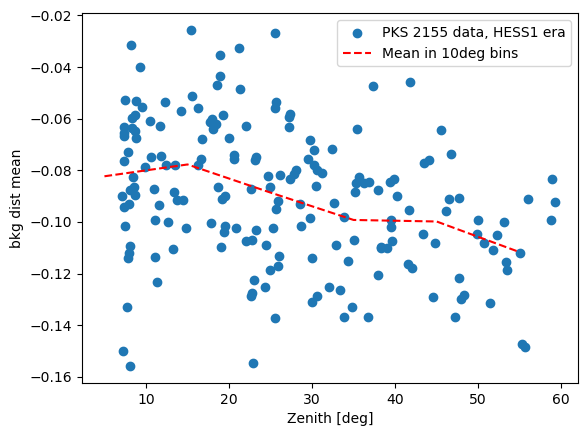

In [127]:
plt.scatter(zen_list, mean_list, label='PKS 2155 data, HESS1 era')
plt.errorbar(intervals+5,moving_avg, label='Mean in 10deg bins', linestyle='--', color = 'red')
plt.xlabel('Zenith [deg]')
plt.ylabel('bkg dist mean')
plt.legend()